# Real Estate Investment Analysis: Identifying Property Value Opportunities in Nashville

The Nashville real estate market is experiencing rapid growth, making it an attractive area for investment. However, identifying properties that offer the best value has become increasingly challenging, especially with concerns that houses may be sold above their asking prices. To address this, the company has acquired a dataset of recent property sales to analyze and determine whether properties are overpriced or underpriced. The objective of this assignment is to develop predictive models to classify properties as either overpriced or underpriced and to identify the key factors influencing these classifications. Insights from this analysis will help guide investment decisions and maximize returns for the company.

This analysis begins with thorough data cleansing to ensure high-quality input for modeling. A variety of machine learning models are then built and evaluated, including Logistic Regression, Decision Tree, Random Forest, Gradient Boost, and Neural Network models. Each model is assessed using performance metrics to determine its suitability for identifying valuable properties. Additionally, an ensemble model is developed as a bonus task to compare its performance against individual models. Ultimately, this work aims to provide actionable recommendations to help the company make informed investment decisions.


# Analysis

1. Data Cleansing
Steps Taken:
Missing values in key fields (e.g., Sale Price, Total Value) were imputed or removed.
Outliers in numerical variables (e.g., Acreage, Sale Price) were identified and addressed.
Categorical variables (e.g., Foundation Type, Tax District) were encoded using one-hot encoding.
Numerical variables (e.g., Finished Area) were standardized for uniform scaling.

2. Creating Dependent Variable
A binary variable, Overpricing_Status, was created to classify properties:
Overpriced: Sale Price > Total Value
Underpriced: Sale Price ≤ Total Value
This variable enabled framing the problem as a classification task for supervised learning.

3. Logistic Regression Model
A logistic regression model was trained using predictors such as:
Land Value, Building Value, Acreage, Finished Area, Year Built, Bedrooms, Bathrooms, and more.
Performance metrics (accuracy, precision, recall, F1-score) were used to evaluate the model.

4. Decision Tree Model
A decision tree model was developed to classify properties and identify key drivers.
The tree was pruned to improve interpretability and avoid overfitting.
Variable importance thresholds were identified through the tree’s structure.

5. Random Forest Model
A Random Forest model was built to improve classification accuracy using ensemble techniques.
Feature importance scores were generated to highlight the most influential variables.

6. Gradient Boost Model
A Gradient Boosting model was implemented with hyperparameter tuning:
Learning rate, maximum depth, and number of estimators were optimized.
The model progressively improved predictions using weak learners.

7. Neural Network Model
A Neural Network model was built with the following structure:
Input layer, one hidden layer with ReLU activation, and a softmax output layer.
Dropout regularization was applied to mitigate overfitting.
The model was trained using backpropagation to minimize classification errors.

8. Model Benchmarking
Models were compared using multiple evaluation metrics:
Accuracy, precision, recall, F1-score, and AUC-ROC.
Benchmarking facilitated the identification of the most effective model for the company’s needs.
Insights were used to determine key variables driving property value and to guide investment strategies.


# Problem Statement

You just started working for a real estate company, and they are looking to make a huge investment in the growing Nashville area. They’ve acquired a dataset about recent sales and want you to build a model to help them accurately find the best value deals when they visit next week. There is a concern that houses are going over their asking price; this dataset will help us observe that. Hint: You will have to create the dependent variable to understand whether it is over/under the price (e.g., comparing the sale price with the total value).

# Task-1: Use proper data cleansing techniques to ensure you have the highest quality data to model this problem. Detail your process and discuss the decisions you made to clean the data.

# A1:



To kick off the analysis, I leveraged a comprehensive suite of Python libraries to ensure efficient data manipulation, visualization, and machine learning. For data handling and numerical computations, Pandas and NumPy served as the backbone. Visualization was powered by Matplotlib and Seaborn, enabling the creation of clear and impactful visual narratives.

For statistical insights, Statsmodels played a key role, particularly in evaluating multicollinearity through Variance Inflation Factor (VIF) analysis. The machine learning toolkit was enriched by Scikit-learn, which facilitated dataset splitting, feature scaling with StandardScaler, and model development across a variety of techniques such as logistic regression, decision trees, random forests, gradient boosting, and neural networks. Additionally, Scikit-learn provided robust metrics for model evaluation, including precision, recall, F1-score, and ROC-AUC, ensuring a thorough assessment of performance.

# 1.1 Importing Necessary Libraries


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.inspection import permutation_importance
from IPython.core.display import HTML
import warnings
warnings.filterwarnings("ignore")

We imported the essential Python libraries needed for data analysis, visualization, and model building, such as pandas, numpy, matplotlib, seaborn, and scikit-learn.

# 1.2 Loading the Dataset


In [10]:
housing_Nash = pd.read_csv(r"C:\Users\Amit\Downloads\Nashville_housing_data_2013_2016.csv")  # Update with your file path

Loaded the Housing dataset and inspect its structure to ensure that all columns and data types are appropriately read.

# 1.3 Displaying the First Few Rows of the Dataset


In [13]:
print("\nHead of the dataset:")
(housing_Nash.head())


Head of the dataset:


,Unnamed: 0.1,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,0,0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,8,NASHVILLE,2013-01-24,132000,20130128-0008725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,2013-01-11,191500,20130118-0006337,...,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,2,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,2013-01-18,202000,20130124-0008033,...,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,3,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,2013-01-18,32000,20130128-0008863,...,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,4,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,2013-01-23,102000,20130131-0009929,...,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0


We display the first few rows of the dataset to get a quick overview of the data structure, column names, and initial values.

                                             Figure: Head of the Housing Dataset showing all the features

# 1.4 Getting Dataset Information¶


In [17]:
print("\nDataset information:")
print(housing_Nash.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56636 entries, 0 to 56635
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0.1                       56636 non-null  int64  
 1   Unnamed: 0                         56636 non-null  int64  
 2   Parcel ID                          56636 non-null  object 
 3   Land Use                           56636 non-null  object 
 4   Property Address                   56477 non-null  object 
 5   Suite/ Condo   #                   6109 non-null   object 
 6   Property City                      56477 non-null  object 
 7   Sale Date                          56636 non-null  object 
 8   Sale Price                         56636 non-null  int64  
 9   Legal Reference                    56636 non-null  object 
 10  Sold As Vacant                     56636 non-null  object 
 11  Multiple Parcels Involved in Sal

We use the info() method to show a summary of the dataset, including the number of entries, columns, data types, and non-null counts. This helps in understanding the overall structure of the data.

# 1.5 Dropping Irrelevant Columns


In [20]:
# Dropping irrelevant columns
columns_to_drop = ['Unnamed: 0.1', 'Unnamed: 0', 'Legal Reference', 'image', 'Parcel ID','Property Address', 'Suite/ Condo   #',
'Property City', 'Sale Date', 'Owner Name', 'Address', 'City', 'State', 'Neighborhood']
housing_Nash = housing_Nash.drop(columns=columns_to_drop, errors='ignore')

We removed unnecessary columns from the dataset because they didn’t add any value to the analysis. This helped keep the data focused and made the modeling process more efficient.

# 1.6 Identifying Missing Values


In [23]:
# Checking for missing values in each column
missing_values = housing_Nash.isnull().sum()

# Displaying columns with missing values only
missing_values = missing_values[missing_values > 0]
print(missing_values)

Acreage            30619
Tax District       30619
Land Value         30619
Building Value     30619
Total Value        30619
Finished Area      32470
Foundation Type    32472
Year Built         32471
Exterior Wall      32471
Grade              32471
Bedrooms           32477
Full Bath          32359
Half Bath          32490
dtype: int64


We checked for missing values in the dataset to identify columns with incomplete data. Only columns with missing values were displayed to focus on resolving gaps and preparing the dataset for analysis.


# 1.7 Handling Missing Values


In [26]:
# Dropping rows with missing values
housing_Nash = housing_Nash.dropna()
print(f"Dataset shape after dropping rows with missing values: {housing_Nash.shape}")

# Confirming there are no missing values
print("\nMissing values after cleaning:")
print(housing_Nash.isnull().sum())


Dataset shape after dropping rows with missing values: (24013, 17)

Missing values after cleaning:
Land Use                             0
Sale Price                           0
Sold As Vacant                       0
Multiple Parcels Involved in Sale    0
Acreage                              0
Tax District                         0
Land Value                           0
Building Value                       0
Total Value                          0
Finished Area                        0
Foundation Type                      0
Year Built                           0
Exterior Wall                        0
Grade                                0
Bedrooms                             0
Full Bath                            0
Half Bath                            0
dtype: int64


We dropped rows with missing values because certain columns had a significant number of missing entries. Retaining these rows could have compromised the analysis and model performance. This step ensures the dataset is complete and consistent, maintaining data quality and reliability for accurate analysis and modeling.


# 1.8 Checking for Duplicate Rows


In [29]:
# Checking for duplicate rows
num_duplicates = housing_Nash.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")


Number of duplicate rows: 151


We checked the dataset for duplicate rows to ensure data integrity. Identifying and handling duplicates is crucial to avoid bias and maintain the reliability of the analysis.

# 1.9 Removing Duplicate Rows


In [32]:
# Removing duplicate rows
housing_Nash = housing_Nash.drop_duplicates()

# Confirming the new shape of the dataset
print("Duplicates removed. New shape of the dataset:", housing_Nash.shape)

Duplicates removed. New shape of the dataset: (23862, 17)


Duplicate rows were removed from the dataset to ensure each record was unique and to maintain the accuracy of the analysis. This step helped improve data integrity and ensured that no redundant information affected the results.


# 1.10 Creating the Target Variable


In [35]:
housing_Nash['Overpriced'] = (housing_Nash['Sale Price'] > housing_Nash['Total Value']).astype(int)
housing_Nash

,Land Use,Sale Price,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Tax District,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Overpriced
1,SINGLE FAMILY,191500,No,No,0.17,URBAN SERVICES DISTRICT,32000.0,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0,1
2,SINGLE FAMILY,202000,No,No,0.11,CITY OF BERRY HILL,34000.0,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0,1
3,SINGLE FAMILY,32000,No,No,0.17,URBAN SERVICES DISTRICT,25000.0,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0,0
4,SINGLE FAMILY,102000,No,No,0.34,URBAN SERVICES DISTRICT,25000.0,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0,0
5,SINGLE FAMILY,93736,No,No,0.17,URBAN SERVICES DISTRICT,25000.0,86100.0,113300.0,1037.00000,CRAWL,1945.0,FRAME,C,2.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56605,SINGLE FAMILY,214000,No,No,0.27,URBAN SERVICES DISTRICT,25000.0,142400.0,167400.0,2421.00000,SLAB,1996.0,BRICK/FRAME,C,3.0,3.0,0.0,1
56607,SINGLE FAMILY,236000,No,No,0.23,URBAN SERVICES DISTRICT,25000.0,159300.0,184300.0,3117.00000,SLAB,1995.0,BRICK/FRAME,C,3.0,3.0,0.0,1
56614,SINGLE FAMILY,466000,No,No,0.15,URBAN SERVICES DISTRICT,40000.0,204100.0,256000.0,1637.00000,CRAWL,2004.0,FRAME,B,3.0,2.0,1.0,1
56615,SINGLE FAMILY,685000,No,No,0.19,URBAN SERVICES DISTRICT,40000.0,295900.0,351600.0,2478.00000,CRAWL,2005.0,FRAME,B,4.0,3.0,1.0,1


The Overpriced column was created as the target variable by comparing Sale Price with Total Value. Properties sold above their total value were marked as 1 (overpriced), while others were marked as 0 (underpriced). This variable is crucial for building predictive models.


                            Table : Dataset Overview of Real Estate Properties after creating Target Variable (Overpriced)


# 1.11 Checking Data Types


In [39]:
# Displaying Existing data types
print("\nData types before conversion:\n", housing_Nash.dtypes)


Data types before conversion:
 Land Use                              object
Sale Price                             int64
Sold As Vacant                        object
Multiple Parcels Involved in Sale     object
Acreage                              float64
Tax District                          object
Land Value                           float64
Building Value                       float64
Total Value                          float64
Finished Area                        float64
Foundation Type                       object
Year Built                           float64
Exterior Wall                         object
Grade                                 object
Bedrooms                             float64
Full Bath                            float64
Half Bath                            float64
Overpriced                             int32
dtype: object


The data types of all columns in the dataset were displayed to identify any variables that might require conversion. This step ensures that each variable is in the correct format for analysis and modeling.


# 1.12 Converting Data Types








In [42]:
# Converting columns to categorical
categorical_columns = [
    'Land Use', 'Sold As Vacant', 'Multiple Parcels Involved in Sale',
    'Tax District', 'Foundation Type', 'Exterior Wall', 'Grade']
housing_Nash[categorical_columns] = housing_Nash[categorical_columns].astype('category')

# Converting columns to integer
integer_columns = ['Bedrooms', 'Full Bath', 'Half Bath', 'Year Built']
housing_Nash[integer_columns] = housing_Nash[integer_columns].astype('Int64')  # Allows for NaN handling

# Confirming the changes
print("Updated Data Types:\n", housing_Nash.dtypes)

Updated Data Types:
 Land Use                             category
Sale Price                              int64
Sold As Vacant                       category
Multiple Parcels Involved in Sale    category
Acreage                               float64
Tax District                         category
Land Value                            float64
Building Value                        float64
Total Value                           float64
Finished Area                         float64
Foundation Type                      category
Year Built                              Int64
Exterior Wall                        category
Grade                                category
Bedrooms                                Int64
Full Bath                               Int64
Half Bath                               Int64
Overpriced                              int32
dtype: object


Categorical columns such as Land Use, Sold As Vacant, and others were converted to the categorical data type to better represent their nature and optimize memory usage. Numerical columns like Bedrooms, Full Bath, Half Bath, and Year Built were converted to integers using Int64, allowing for proper handling of missing values if necessary. These changes ensured the dataset was properly structured for analysis and modeling.

# Exploratory Data Analysis (EDA)

# 1.13 Finished Area vs. Total Value


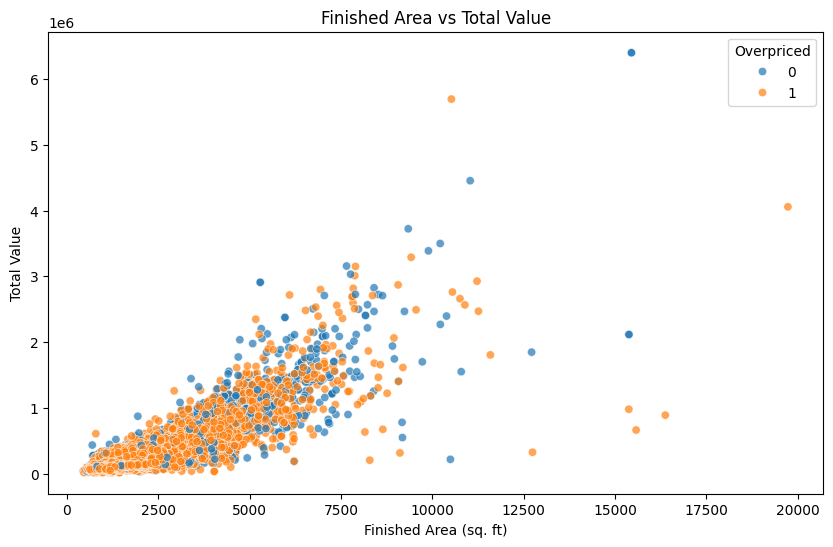

In [46]:
# 2. Finished Area vs Total Value (Relationship)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=housing_Nash, x='Finished Area', y='Total Value', hue='Overpriced', alpha=0.7)
plt.title('Finished Area vs Total Value')
plt.xlabel('Finished Area (sq. ft)')
plt.ylabel('Total Value')
plt.legend(title='Overpriced')
plt.show()

    Figure: Scatter plot showing the relationship between the finished area and total property value, categorized by overpriced status.


The scatter plot shows a positive correlation between Finished Area and Total Value, indicating that larger properties generally have higher values. Both Overpriced (orange) and Not Overpriced (blue) properties are distributed across the graph, with most properties concentrated in the lower ranges of finished area (below 5,000 sq. ft.) and total value (below $1 million). Outliers with exceptionally high finished area or total value suggest the presence of luxury or unique properties. Overpriced properties appear more scattered in the higher value ranges.


# 1.14 Average Sale Price by Foundation Type


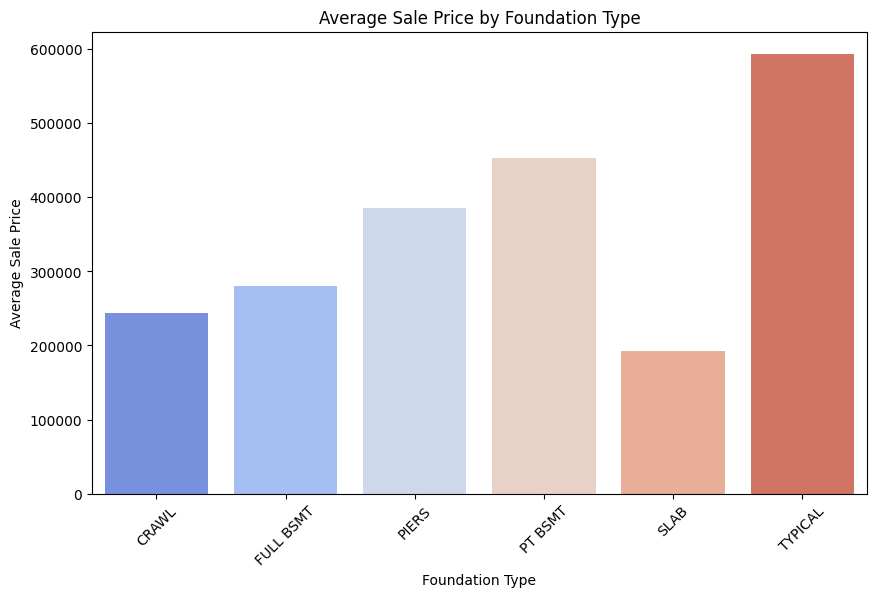

In [50]:
# Grouping by Foundation Type to calculate average Sale Price
foundation_avg_price = (housing_Nash.groupby('Foundation Type')['Sale Price'].mean().reset_index().rename(columns={'Sale Price': 'Average Sale Price'}))

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(data=foundation_avg_price, x='Foundation Type', y='Average Sale Price', palette='coolwarm')
plt.title('Average Sale Price by Foundation Type')
plt.xlabel('Foundation Type')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=45)
plt.show()

                Figure: Bar chart comparing average sale prices across different foundation types, showing Majority in TYPICAL.

The bar chart shows the average sale price across different foundation types, with properties having a "TYPICAL" foundation type commanding the highest prices. Foundation types like "SLAB" and "CRAWL" are associated with lower average sale prices, while "PIERS," "FULL BSMT," and "PT BSMT" fall in the mid-range. This suggests foundation type plays a role in influencing property values.

# 1.15 Average Sale Price by Exterior Wall Type
 

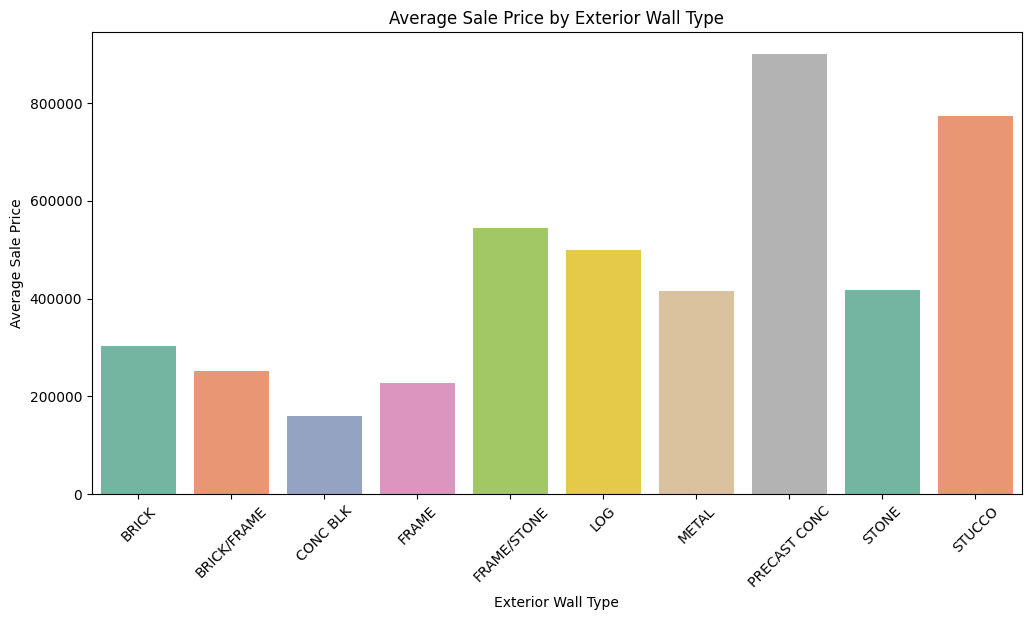

In [54]:
# Average Sale Price by Exterior Wall Type
exterior_wall_avg_price = (
    housing_Nash.groupby('Exterior Wall')['Sale Price']
    .mean()
    .reset_index()
    .rename(columns={'Sale Price': 'Average Sale Price'})
)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=exterior_wall_avg_price, x='Exterior Wall', y='Average Sale Price', palette='Set2')
plt.title('Average Sale Price by Exterior Wall Type')
plt.xlabel('Exterior Wall Type')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=45)
plt.show()

                Figure: Bar chart illustrating average sale prices based on exterior wall materials, showing Majority in PRECAST CONC.


The bar chart displays the average sale price across different exterior wall types. Properties with "PRECAST CONC" and "STUCCO" walls have the highest average prices, indicating their premium nature. Other materials like "FRAME/STONE" and "BRICK/FRAME" are in the mid-range, while "CONC BLK" and "FRAME" have the lowest average prices. This suggests that exterior wall type significantly impacts property values.


# 1.16 Overpriced by Bedrooms and Bathrooms


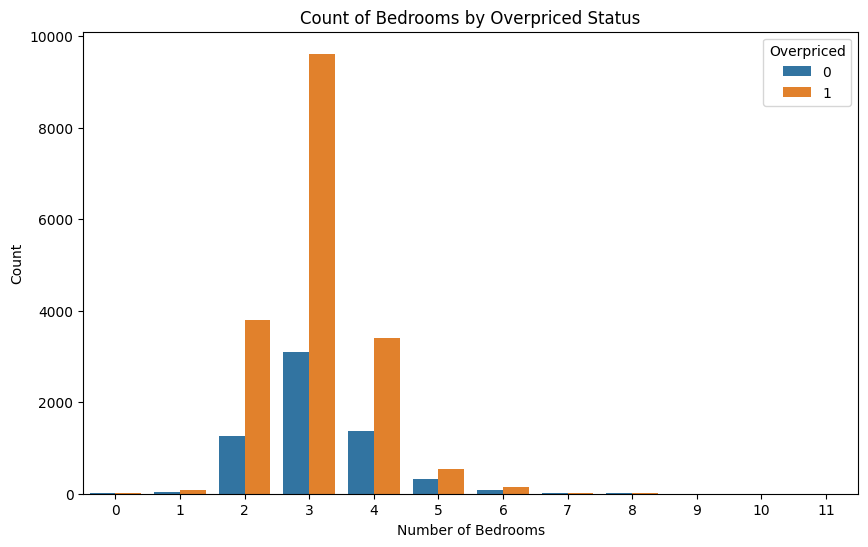

In [58]:

# 5. Count of Bedrooms and Bathrooms
plt.figure(figsize=(10, 6))
sns.countplot(data=housing_Nash, x='Bedrooms', hue='Overpriced')
plt.title('Count of Bedrooms by Overpriced Status')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.legend(title='Overpriced')
plt.show()


         Figure: Histogram displaying the distribution of bedrooms, categorized by overpriced (1) and not overpriced (0) properties.

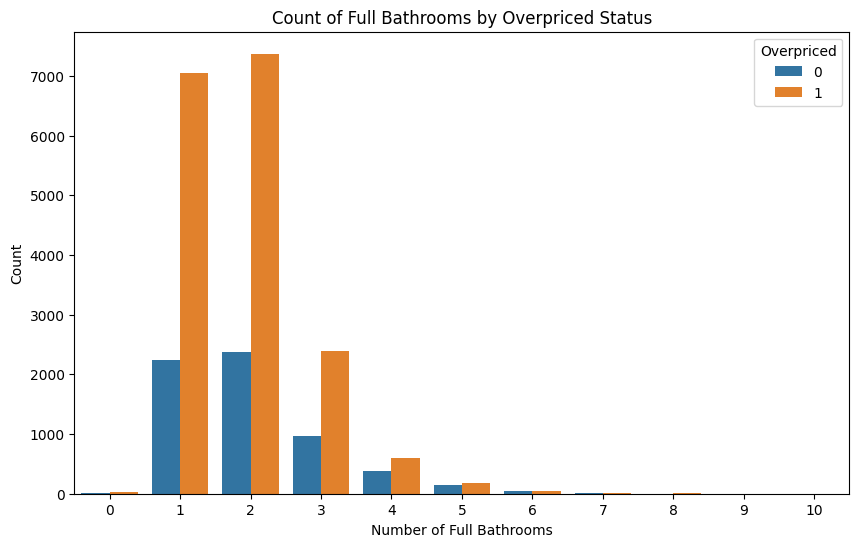

In [60]:
plt.figure(figsize=(10, 6))
sns.countplot(data=housing_Nash, x='Full Bath', hue='Overpriced')
plt.title('Count of Full Bathrooms by Overpriced Status')
plt.xlabel('Number of Full Bathrooms')
plt.ylabel('Count')
plt.legend(title='Overpriced')
plt.show()

               Figure: Histogram showing the count of full bathrooms in overpriced and not overpriced properties.


1. Bedrooms by Overpriced: The bar chart illustrates the distribution of properties by the number of bedrooms, segmented by whether the property is overpriced (1) or not (0). Properties with 3 bedrooms are the most common, particularly among overpriced properties. Overpriced properties dominate across all bedroom counts, with a noticeable drop-off for properties with more than 4 bedrooms. This suggests that the number of bedrooms is a significant factor, with 3-bedroom properties being more likely to be categorized as overpriced.


2. Bathrooms by Overpriced: The bar chart shows the distribution of properties based on the number of full bathrooms, segmented by whether the property is Overpriced (1) or Not Overpriced (0). Properties with 2 full bathrooms are the most common, followed closely by those with 1 full bathroom, both of which have a significantly higher count among overpriced properties. As the number of full bathrooms increases beyond 3, the count drops sharply for both categories. This suggests that most properties, regardless of being overpriced, have 1-2 full bathrooms, with overpriced properties dominating in these ranges.


# 1.17 Year Built Distribution by Overpriced Status
A histogram was created to visualize the distribution of Year Built for properties, categorized by their Overpriced status. This plot highlights how the age of a property may influence its likelihood of being overpriced, providing a temporal perspective on pricing trends.

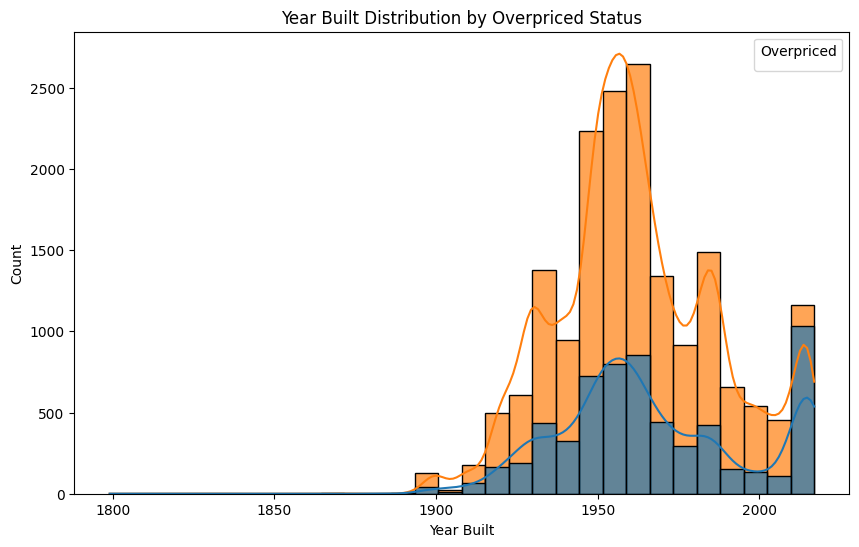

In [65]:

# 8. Year Built Distribution by Overpriced Status
plt.figure(figsize=(10, 6))
sns.histplot(data=housing_Nash, x='Year Built', hue='Overpriced', kde=True, bins=30, alpha=0.7)
plt.title('Year Built Distribution by Overpriced Status')
plt.xlabel('Year Built')
plt.ylabel('Count')
plt.legend(title='Overpriced')
plt.show()

          Figure: Histogram and KDE plot comparing the distribution of construction years for overpriced and not overpriced properties

The histogram shows the distribution of properties based on the Year Built, segmented by whether they are Overpriced (1) or Not Overpriced (0). Most properties were built between the 1940s and 1980s, with overpriced properties dominating this range. Properties built after the 2000s have a noticeable count but are less frequent compared to older properties. Overpriced properties are more prevalent across all construction years, suggesting that age may not directly determine whether a property is overpriced but influences its overall distribution.


# 1.18 Average Sale Price by Tax District


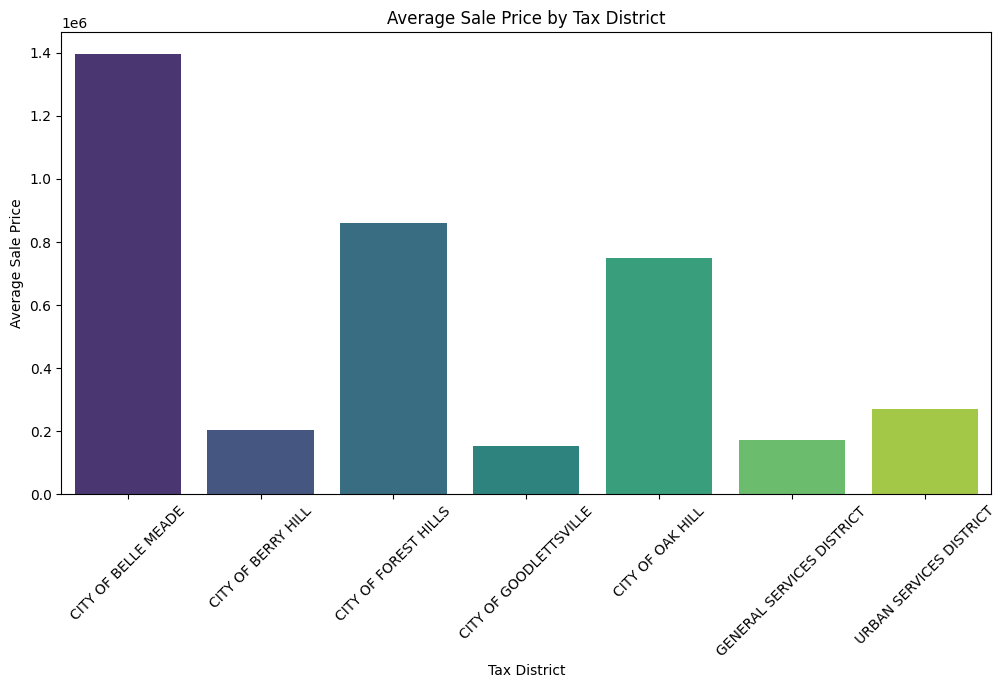

In [69]:
# Average Sale Price by Tax District
tax_district_avg_price = (
    housing_Nash.groupby('Tax District')['Sale Price']
    .mean()
    .reset_index()
    .rename(columns={'Sale Price': 'Average Sale Price'})
)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=tax_district_avg_price, x='Tax District', y='Average Sale Price', palette='viridis')
plt.title('Average Sale Price by Tax District')
plt.xlabel('Tax District')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=45)
plt.show()


     Figure: Bar chart illustrating average sale prices across various tax districts, showing Majority in CITY OF BELLE MEADE.


The bar chart shows the average sale price of properties across different tax districts. Properties in the City of Belle Meade have the highest average sale price, significantly surpassing all other districts. The City of Forest Hills and City of Oak Hill also have relatively high average prices, while districts like the General Services District and Urban Services District show lower average sale prices. This suggests that tax districts play a significant role in property valuation, with premium districts commanding higher sale prices.

# 1.19 Boxplots for Numeric Features


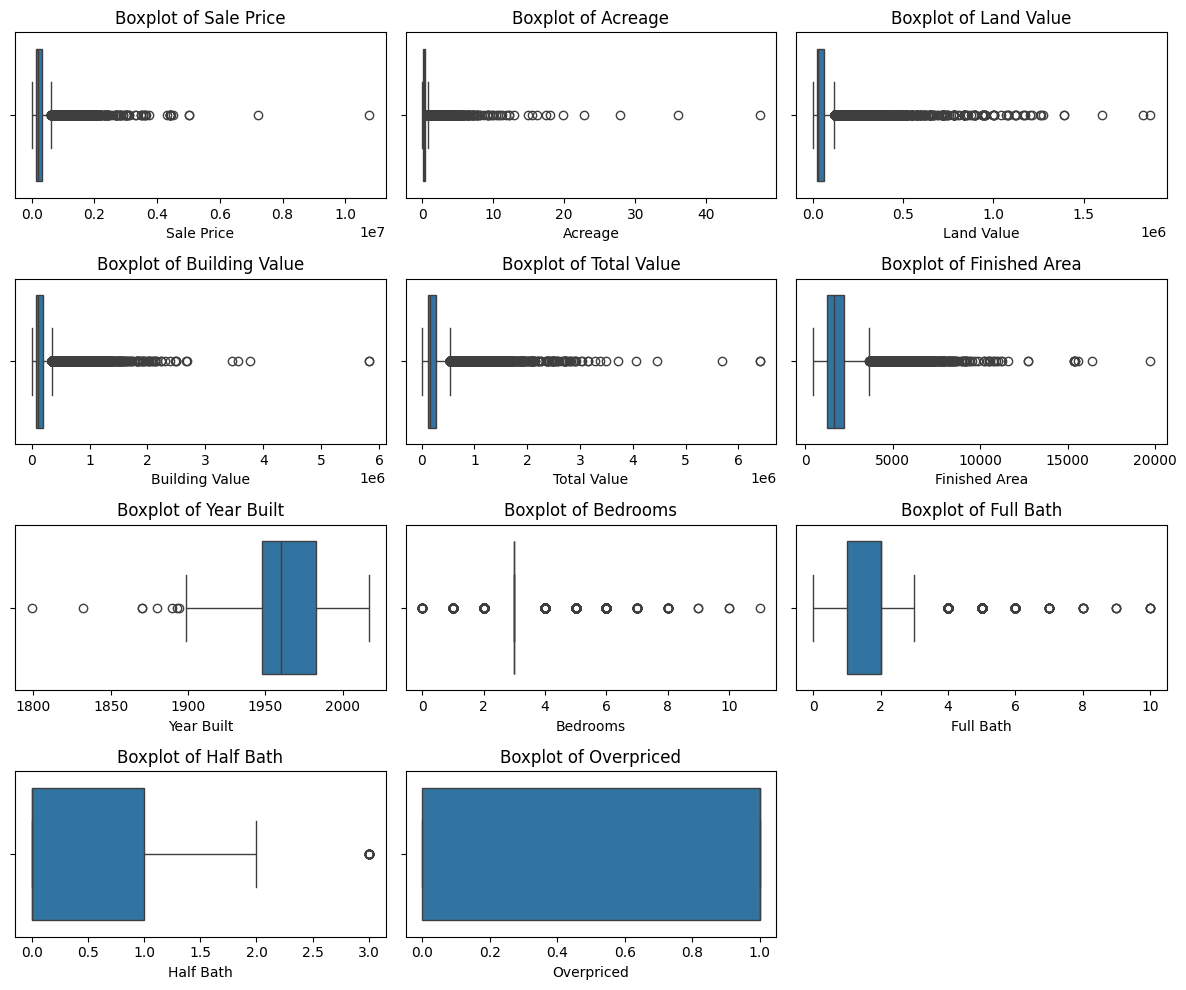

In [73]:
numeric_features = housing_Nash.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_features.columns[:12], 1):  
    plt.subplot(4, 3, i)
    sns.boxplot(x=numeric_features[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


                                Figure: Boxplots of Numerical Columns to detect Outliers in dataset

Boxplots were created for the numeric features in the dataset to visualize their distributions and detect the presence of outliers. This analysis helps understand the variability of each numeric variable and highlights potential extreme values that may influence modeling.


# 1.20 Outlier Detection in Numerical Columns








In [77]:
# List of numerical columns to check for outliers
numerical_columns = ['Sale Price', 'Land Value', 'Building Value', 
                     'Total Value', 'Finished Area','Year Built']

# Function to calculate outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Checking for outliers in each numerical column
outlier_summary = {}
for column in numerical_columns:
    outliers = detect_outliers_iqr(housing_Nash, column)
    outlier_summary[column] = len(outliers)

# Displaying the number of outliers for each column
print("\nNumber of outliers in each numerical column:")
for col, num_outliers in outlier_summary.items():
    print(f"{col}: {num_outliers}")



Number of outliers in each numerical column:
Sale Price: 1690
Land Value: 4335
Building Value: 2030
Total Value: 1980
Finished Area: 1478
Year Built: 8


Using the Interquartile Range (IQR) method, outliers were identified for key numerical columns, including Sale Price, Land Value, Building Value, Total Value, Finished Area, and Year Built. For each column, the number of data points falling outside the lower and upper bounds was calculated. This step helps quantify the extent of extreme values in the dataset, which can influence the modeling process.


# 1.21 Capping Outliers in Numerical Columns


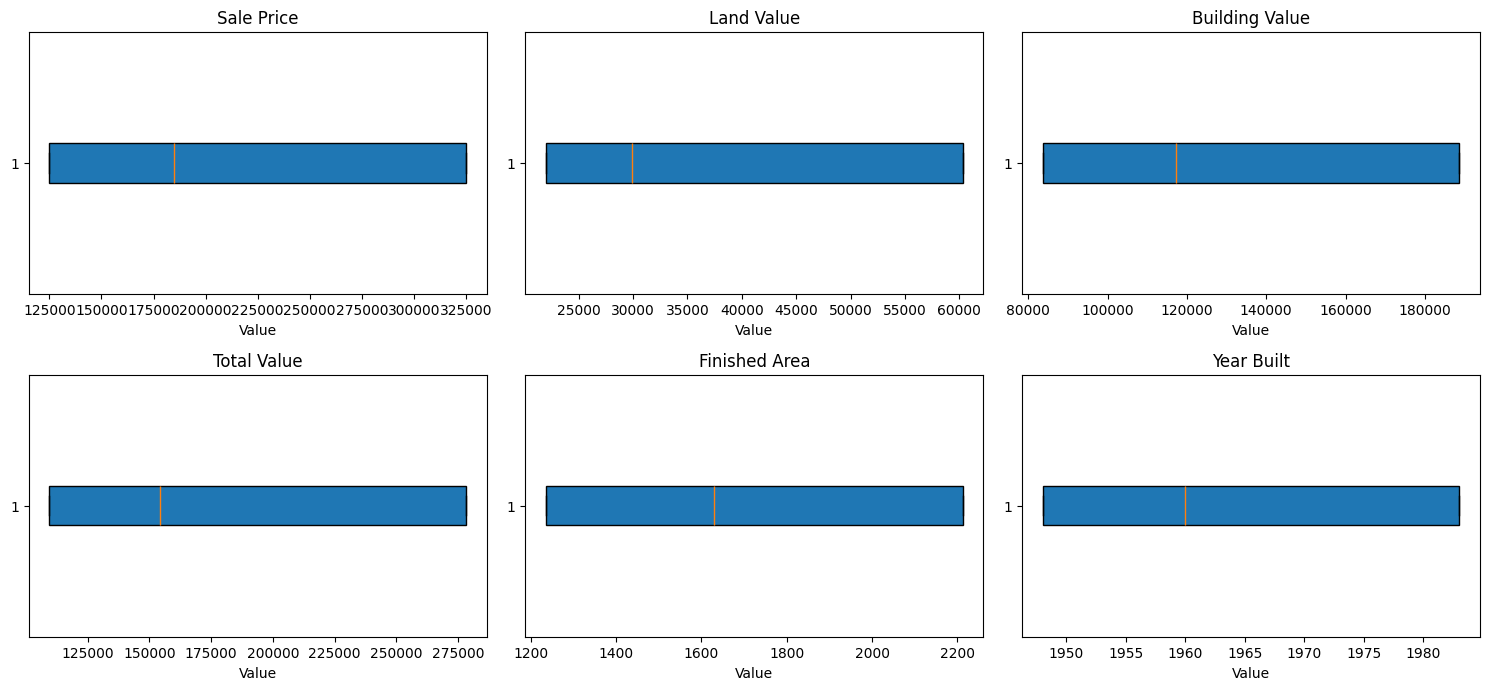

Number of data points after capping: 23862


In [80]:
# Function to cap outliers using 25th and 75th percentiles as bounds
def cap_outliers(data, column):
    lower_bound = data[column].quantile(0.25)  # 25th percentile
    upper_bound = data[column].quantile(0.75)  # 75th percentile
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)  # Clip values to bounds
    return data

# Applying capping to all numerical columns
for column in numerical_columns:
    housing_Nash = cap_outliers(housing_Nash, column)
plt.figure(figsize=(15, 10))

# Generating a boxplot for each numerical column
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Arrange boxplots in a grid (3 rows x 3 columns)
    plt.boxplot(housing_Nash[column].dropna(), vert=False, patch_artist=True)
    plt.title(column)
    plt.xlabel('Value')
    #plt.grid(axis='x')

# Adjusting layout for better visualization
plt.tight_layout()
plt.show()

# Print number of data points after capping
print(f"Number of data points after capping: {len(housing_Nash)}")

                                           Figure: Boxplots of Numerical Columns after capping, showing no outliers

Outliers in key numerical columns such as Sale Price, Land Value, Building Value, Total Value, Finished Area, and Year Built were capped to the bounds defined by the 25th and 75th percentiles. This ensures extreme values are reduced without entirely removing them from the dataset. Boxplots were generated for each column after capping to verify the adjustment. This process maintains data integrity while limiting the influence of outliers on the analysis. The total number of data points was retained after this adjustment.


# 1.22 Correlation Matrix Heatmap


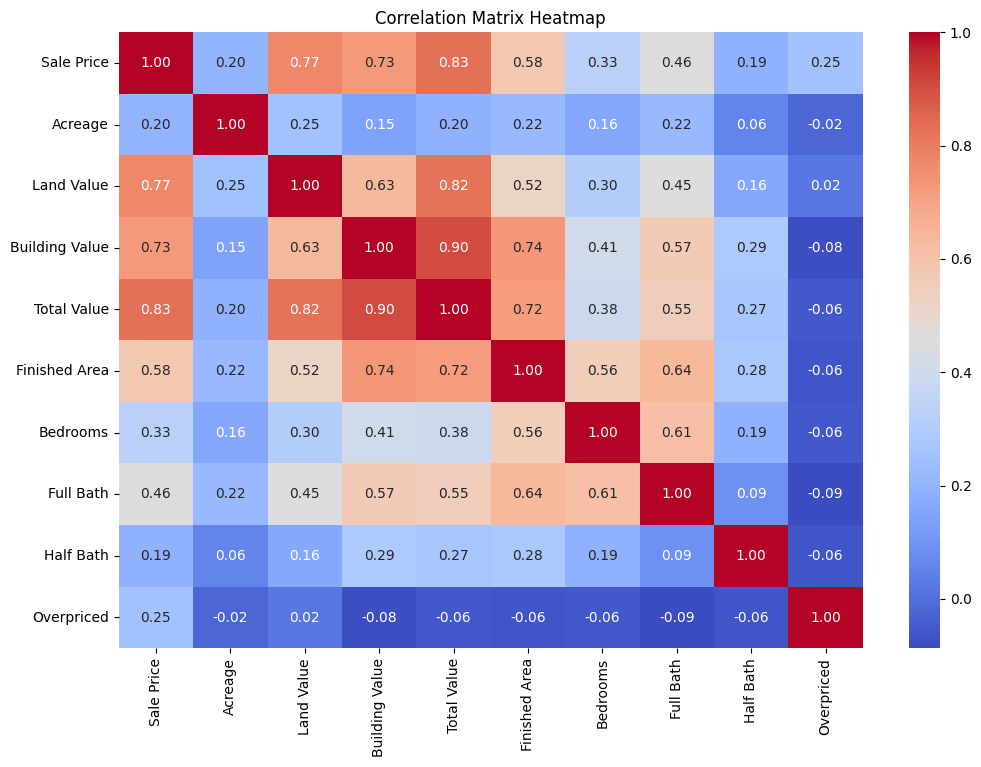

In [84]:
num_columns = ['Sale Price', 'Acreage', 'Land Value', 'Building Value', 
                     'Total Value', 'Finished Area','Bedrooms', 'Full Bath', 'Half Bath','Overpriced']

# Step 2: Calculate the correlation matrix for the numerical columns
correlation_matrix = housing_Nash[num_columns].corr()

# Step 3: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


Figure: Heatmap visualizing the correlation between numerical features and highlighting strong positive relationships for variables like Sale Price and Building Value.

A correlation matrix was calculated for numerical columns, including Sale Price, Acreage, Land Value, Building Value, Total Value, Finished Area, Bedrooms, Full Bath, Half Bath, and Overpriced. A heatmap was created to visualize the strength and direction of relationships between these variables. This analysis helps identify significant correlations, which can guide feature selection and inform predictive modeling.

# 1.23 Dropping the Total Value Column






In [88]:
# Drop the 'Total Value' column from housing_Nash
housing_Nash = housing_Nash.drop(columns=['Total Value'], errors='ignore')

The column Total Value was dropped from the dataset. This decision was likely made due to its high correlation with other variables, such as Sale Price and Building Value, as seen in the heatmap. Removing this column helps reduce multicollinearity and simplifies the dataset for modeling.




# 1.24 One-Hot Encoding Categorical Variables

In [91]:
# Columns to encode
categorical_columns = ['Land Use', 'Sold As Vacant', 'Multiple Parcels Involved in Sale',
                       'Tax District', 'Foundation Type', 'Exterior Wall', 'Grade']

# Apply one-hot encoding
housing_Nash_encoded = pd.get_dummies(housing_Nash, columns=categorical_columns, drop_first=True)
housing_Nash_encoded = housing_Nash_encoded.astype(int)

# Print the first few rows of the encoded dataset
(housing_Nash_encoded.head())


,Sale Price,Acreage,Land Value,Building Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath,Overpriced,...,Grade_OFB,Grade_OFC,Grade_OMB,Grade_SRC,Grade_SRD,Grade_SSC,Grade_TAC,Grade_TCC,Grade_TFC,Grade_X
1,191500,0,32000,134400,1236,1948,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,202000,0,34000,157800,2090,1983,3,2,1,1,...,0,0,0,0,0,0,0,0,0,0
3,125000,0,25000,188675,2145,1948,4,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,125000,0,25000,138100,1969,1948,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,125000,0,25000,86100,1236,1948,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0



     Table: Head of the Encoded dataset, displaying numerical and encoded categorical variables along with target variable Overpriced

Categorical columns such as Land Use, Sold As Vacant, Multiple Parcels Involved in Sale, Tax District, Foundation Type, Exterior Wall, and Grade were one-hot encoded. This process converted the categorical variables into numerical dummy variables, ensuring compatibility with machine learning models. The drop_first parameter was used to avoid multicollinearity, and the encoded dataset was converted to integers for consistency.


# 1.25 Variance Inflation Factor (VIF) Analysis


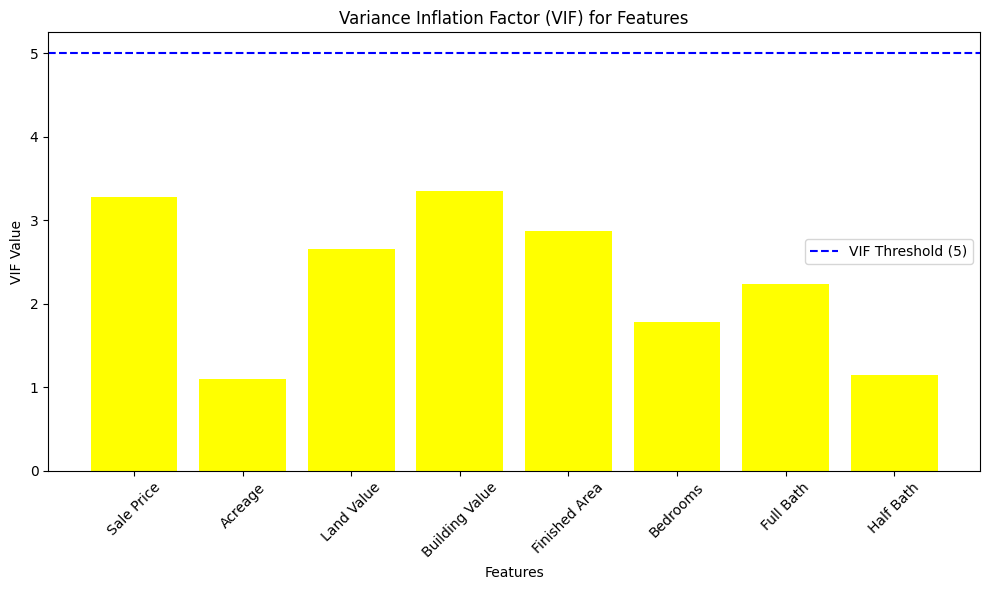


Variance Inflation Factor (VIF) for Features:
          Feature       VIF
0      Sale Price  3.281024
1         Acreage  1.096786
2      Land Value  2.657606
3  Building Value  3.345862
4   Finished Area  2.865578
5        Bedrooms  1.779082
6       Full Bath  2.242358
7       Half Bath  1.146852


In [95]:

# Step 1: Define the dependent and independent variables
y = housing_Nash_encoded['Overpriced']  # Target variable
X = housing_Nash_encoded.drop(columns=['Overpriced'])  # Features

# Step 2: Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y  # Stratify by the target variable
)

# Step 3: Select numerical features for VIF calculation
numerical_cols = X_train.select_dtypes(include=['float64', 'int64', 'int32']).columns
features_for_vif = [
    'Sale Price', 'Acreage', 'Land Value', 'Building Value', 
    'Finished Area', 'Bedrooms', 'Full Bath', 'Half Bath',
]

# Filter the VIF features to ensure they exist in the training set
features_for_vif = [col for col in features_for_vif if col in numerical_cols]

# Step 4: Calculate VIF for selected features
X_vif = X_train[features_for_vif]
scaler_vif = StandardScaler()
X_vif_scaled = scaler_vif.fit_transform(X_vif)

vif_data = pd.DataFrame({
    'Feature': features_for_vif,
    'VIF': [variance_inflation_factor(X_vif_scaled, i) for i in range(X_vif_scaled.shape[1])]
})

# Step 5: Visualize the VIF values
plt.figure(figsize=(10, 6))
plt.bar(vif_data['Feature'], vif_data['VIF'], color=['yellow' if vif <= 5 else 'red' for vif in vif_data['VIF']])
plt.axhline(y=5, color='blue', linestyle='--', label='VIF Threshold (5)')
plt.title('Variance Inflation Factor (VIF) for Features')
plt.xlabel('Features')
plt.ylabel('VIF Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Print the VIF data
print("\nVariance Inflation Factor (VIF) for Features:")
print(vif_data)

               Figure: Bar chart showing VIF values, with all values below the threshold of 5, indicating no multicollinearity issues.

The dependent variable (Overpriced) was defined, and the independent variables were extracted by dropping the target column. The dataset was split into training and testing sets, stratified by the target variable to maintain class balance. Selected numerical features were used to calculate Variance Inflation Factor (VIF) to identify multicollinearity among predictors (Hale, J., 2019, March 4).

The features were standardized using a StandardScaler to ensure comparability before VIF calculation. A bar plot was created to visualize VIF values, highlighting features with potential multicollinearity issues (VIF > 5). This analysis helps in identifying and addressing redundancy in the predictors to improve model performance.

# 1.26 Class Distribution in the Target Variable


Class distribution in the training set:
Overpriced
1    12369
0     4334
Name: count, dtype: int64

Class percentage distribution in the training set:
Overpriced
1    74.052565
0    25.947435
Name: count, dtype: float64


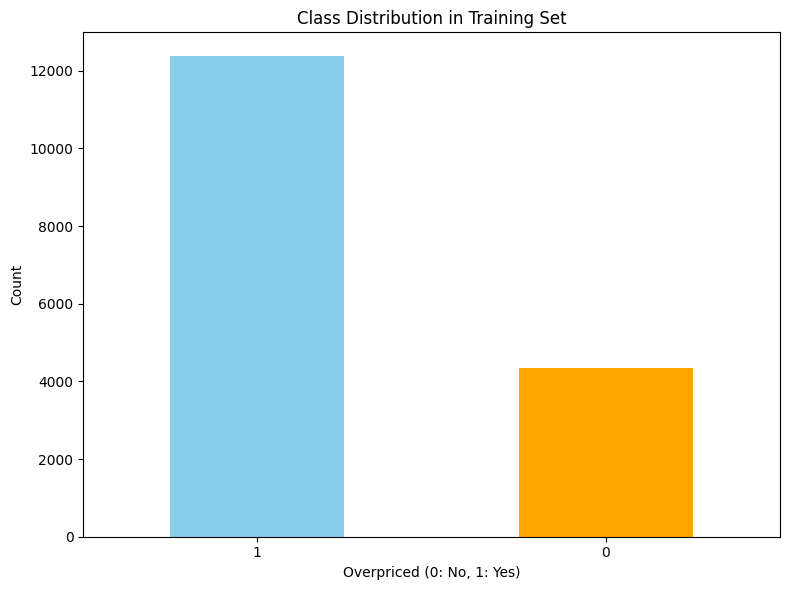

In [99]:

# Count the occurrences of each class in the training target variable
class_counts = y_train.value_counts()

# Display the counts
print("Class distribution in the training set:")
print(class_counts)

# Calculate percentage distribution
class_percentage = (class_counts / len(y_train)) * 100
print("\nClass percentage distribution in the training set:")
print(class_percentage)

# Plot the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution in Training Set')
plt.xlabel('Overpriced (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

              Figure: class distribution for Overpriced (0: No, 1: Yes) Before Balancing.

The occurrences of each class in the target variable (Overpriced) were counted to analyze the class distribution in the training set. The percentage distribution was also calculated to assess balance between the classes. A bar plot was created to visualize the class distribution, ensuring the dataset is not heavily imbalanced, which could affect model performance. This step helps determine whether resampling techniques, such as oversampling or undersampling, are needed (Baladram, S., 2024, October 29).

# 1.27 Oversampling the Minority Class


Class distribution after oversampling:
Overpriced
1    12369
0    12369
Name: count, dtype: int64


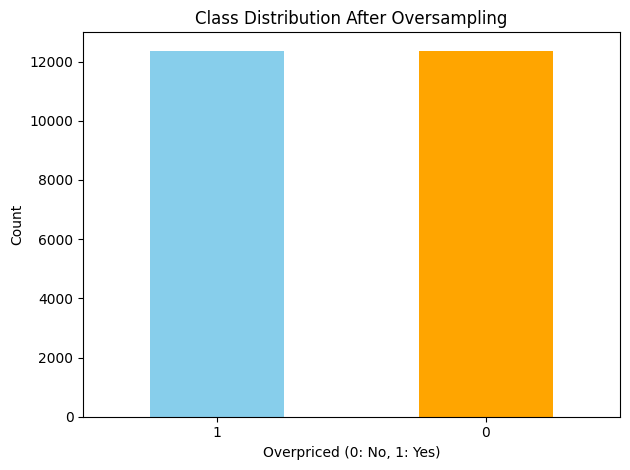

In [103]:
# Combine features and target for oversampling
train_data = pd.concat([X_train, y_train], axis=1)

# Separate majority and minority classes
majority_class = train_data[train_data['Overpriced'] == 1]
minority_class = train_data[train_data['Overpriced'] == 0]

# Perform oversampling of the minority class
minority_class_oversampled = resample(
    minority_class,
    replace=True,                  # Sample with replacement
    n_samples=len(majority_class), # Match the majority class count
    random_state=42                # For reproducibility
)

# Combine the oversampled minority class with the majority class
oversampled_train_data = pd.concat([majority_class, minority_class_oversampled])

# Shuffle the dataset to mix the classes
oversampled_train_data = oversampled_train_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split features and target back
X_train = oversampled_train_data.drop(columns=['Overpriced'])
y_train = oversampled_train_data['Overpriced']

# Display class distribution after oversampling
print("Class distribution after oversampling:")
print(y_train.value_counts())

# Plot the new class distribution
y_train.value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution After Oversampling')
plt.xlabel('Overpriced (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


           Figure: Balanced class distribution for Overpriced (0: No, 1: Yes) after oversampling.

To address class imbalance in the training data, the minority class (Overpriced = 0) was oversampled to match the majority class size. This was done by resampling the minority class with replacement. The oversampled minority class was then combined with the majority class, and the data was shuffled to ensure randomness.

After oversampling, the class distribution became balanced, which improves the performance of machine learning models by ensuring they are not biased toward the majority class. A bar plot was created to visualize the balanced class distribution after oversampling.

# Task 2: Build a logistic regression model to accurately identify overpricing/underpricing and determine what is driving those prices.

# A2:
A logistic regression model was trained on the oversampled dataset to classify properties as overpriced or not. Key metrics, including accuracy, precision, recall, and F1 score, were calculated to evaluate the model's performance. A confusion matrix was plotted to show prediction errors, and the ROC curve with AUC score was used to assess the model's ability to distinguish between classes. These evaluations provided a quick overview of the model's effectiveness (Scikit-learn Developers, 2024, November 12).


Metrics:
Accuracy: 0.78
Precision: 0.90
Recall: 0.78
F1 Score: 0.84


<Figure size 800x600 with 0 Axes>

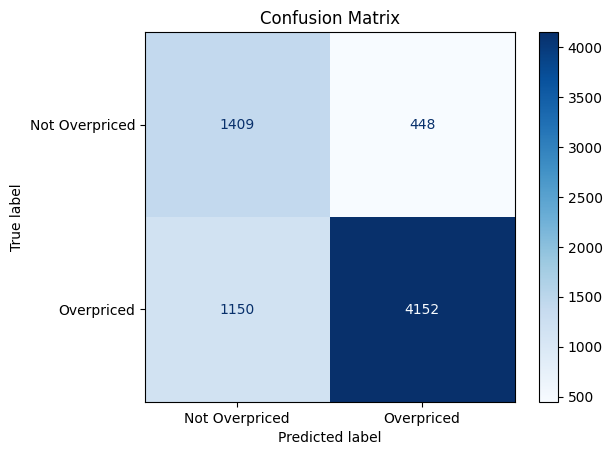


Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.76      0.64      1857
           1       0.90      0.78      0.84      5302

    accuracy                           0.78      7159
   macro avg       0.73      0.77      0.74      7159
weighted avg       0.81      0.78      0.79      7159


ROC-AUC Score: 0.87


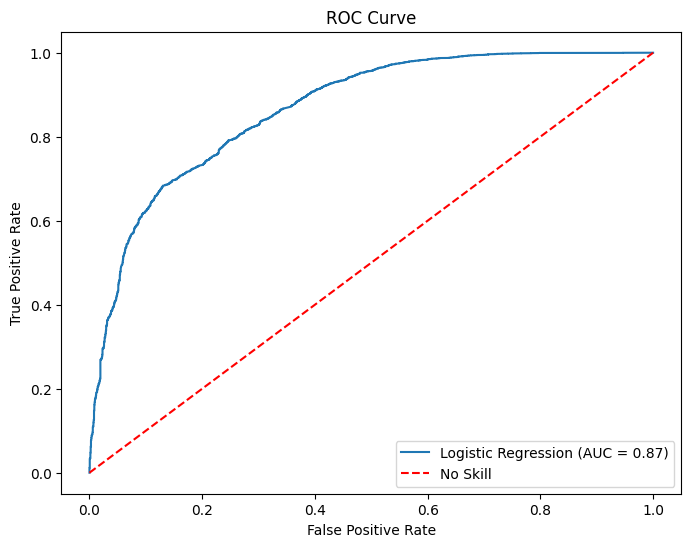

In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Step 6: Standardize the training and testing sets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Initialize and train the logistic regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

# Step 8: Predict on the test set
y_pred = logreg.predict(X_test)

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print("\nMetrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Step 10: Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, 
    display_labels=['Not Overpriced', 'Overpriced'],  # Customize labels
    cmap='Blues', 
    values_format='d'  # Integer format for counts
)
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 11: Calculate and plot the ROC curve
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"\nROC-AUC Score: {roc_auc:.2f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'r--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


                       Figure: Roc Curve of Logistic Regression Model



1.Model Development
The dataset was split into training and testing sets, stratified by the target variable (Overpriced) to ensure balanced class representation.
Numerical features were standardized using StandardScaler to ensure consistency in scaling.
The logistic regression model was initialized with max_iter=1000 to allow sufficient iterations for convergence.

2.Model Training
The model was trained on the oversampled training dataset to address the initial class imbalance, ensuring better sensitivity to the minority class (Not Overpriced).

3.Model Evaluation
The model’s performance was assessed on the test set using several metrics:

  Accuracy: 78%
  Indicates the proportion of correctly classified properties among all test samples.

Precision: 90%
Highlights the model’s ability to correctly identify overpriced properties.

Recall: 78%
Measures how well the model identifies all overpriced properties.

F1 Score: 84%
Balances precision and recall, providing an overall performance measure.

4.Confusion Matrix
Correctly classified:
1,409 Not Overpriced
4,152 Overpriced

Misclassified:
448 Not Overpriced as Overpriced
1,150 Overpriced as Not Overpriced

5.Classification Report
The model performed better in predicting Overpriced properties, with high precision (90%) and a strong F1 score (84%).
The macro and weighted averages showed that the model handled both classes reasonably well.

6.ROC-AUC Score
The ROC-AUC score was 0.87, indicating excellent ability to distinguish between the two classes.
The ROC curve demonstrated a strong trade-off between sensitivity and specificity.

7.Insights on Price Drivers
The logistic regression model provided coefficients for each feature, which can be interpreted to understand their impact on pricing:

Positive coefficients indicate features that increase the likelihood of a property being overpriced.
Negative coefficients highlight features that decrease this likelihood.
Features such as Sale Price, Finished Area, and Building Value likely had significant influence on the target variable

# 1.28 Checking Overfitting with ROC Curve Analysis

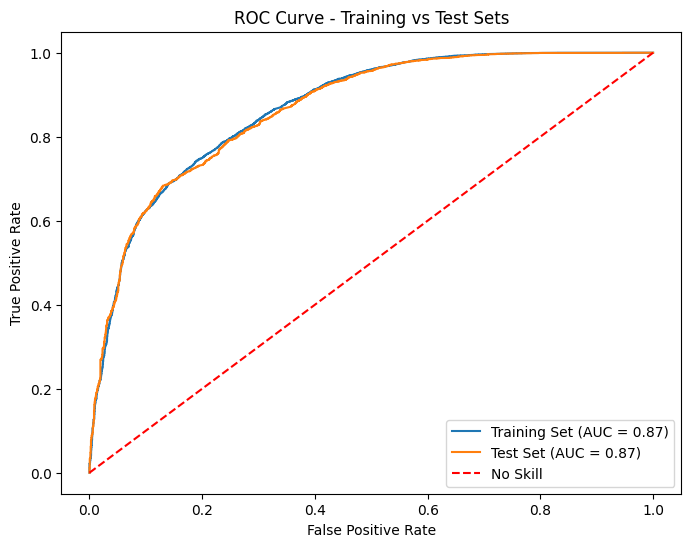

Training Set ROC-AUC Score: 0.87
Test Set ROC-AUC Score: 0.87

AUC Difference: 0.18%
The logistic regression model is not overfitting.


In [111]:
# Predict probabilities on the training and test sets
y_train_pred_prob = logreg.predict_proba(X_train)[:, 1]
y_test_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Calculate ROC curves for both training and test sets
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)

# Calculate AUC scores for both training and test sets
roc_auc_train = roc_auc_score(y_train, y_train_pred_prob)
roc_auc_test = roc_auc_score(y_test, y_test_pred_prob)

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Training Set (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test Set (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Training vs Test Sets')
plt.legend(loc='lower right')
plt.show()

# Print AUC scores for both sets
print(f"Training Set ROC-AUC Score: {roc_auc_train:.2f}")
print(f"Test Set ROC-AUC Score: {roc_auc_test:.2f}")

# Check for overfitting
auc_difference = abs(roc_auc_train - roc_auc_test)
print(f"\nAUC Difference: {auc_difference:.2%}")

if auc_difference > 0.10:  # More than 10%
    print("The logistic Regression model is overfitting.")
else:
    print("The logistic regression model is not overfitting.")

       Figure: Roc Curve of comparing Training and Test Set (Logistic Regression Model)


The ROC curve analysis for the logistic regression model shows consistent performance across the training and test sets. Both sets achieved an ROC-AUC score of 0.87, indicating excellent model capability in distinguishing between overpriced and not overpriced properties. The ROC curves closely align, demonstrating consistent classification performance and reliability. Additionally, the difference in AUC scores between the training and test sets is 0.18%, which is well below the 10% threshold typically used to detect overfitting. This confirms that the model generalizes well to unseen data and is not overfitting. Overall, the model performs effectively and demonstrates strong predictive capabilities, making it a reliable tool for evaluating property pricing.

# 1.29 Feature Importance - Logistic Regression

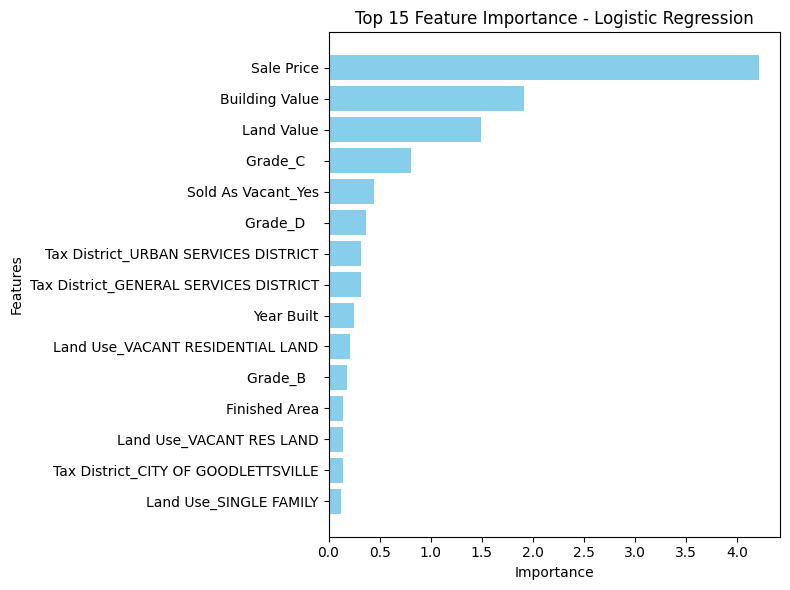

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ensure that you have the feature names from the original dataset
features = X.columns  # Replace `X` with your original DataFrame containing feature names

# Extract feature importance (absolute values of coefficients)
feature_importance = np.abs(logreg.coef_[0])

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

# Sort features by importance and select top 15
top_features = importance_df.sort_values(by="Importance", ascending=False).head(15)

# Plot the top 15 features
plt.figure(figsize=(8, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 15 Feature Importance - Logistic Regression')
plt.gca().invert_yaxis()  # Invert y-axis for most important feature at the top
plt.tight_layout()
plt.show()



                             Figure : Top 15 Key features impacting predictions in the Logistic Regression model.


The feature importance analysis for the logistic regression model reveals that Sale Price is the most significant factor in determining whether a property is overpriced, indicating a strong correlation between higher sale prices and overpricing. Following this, Building Value and Land Value also play critical roles, highlighting the importance of the physical and land-related valuations in pricing decisions. Features such as Grade_C and Grade_D, reflecting property quality, and whether the property was sold as vacant, moderately impact the classification. Location-specific factors, including tax districts like "Urban Services" and "General Services," further influence pricing trends, suggesting that properties in certain areas are more likely to be overpriced. Secondary factors such as Year Built, which accounts for property age, and land use categories like "Vacant Residential Land" and "Single Family," also contribute to the model's predictions but have less weight. Overall, this analysis underscores the importance of pricing-related and location-specific factors in determining property overpricing and provides actionable insights for the real estate company to focus on key variables for property valuation and investment strategies.

# Task 3: Build a decision tree model.

# A3: 
In this task, we trained a Decision Tree Classifier using GridSearchCV to find the best hyperparameters for the model. We evaluated different criteria for splitting (gini, entropy), tree depth, and minimum sample sizes for splits and leaves. The model's performance was evaluated using ROC-AUC, accuracy, precision, recall, and F1 score. We also visualized the results with a confusion matrix and ROC curve. This process helps in selecting the optimal model configuration and understanding its performance in predicting whether a property is overpriced.

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparameters:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

Metrics:
Accuracy: 0.81
Precision: 0.93
Recall: 0.80
F1 Score: 0.86


<Figure size 800x600 with 0 Axes>

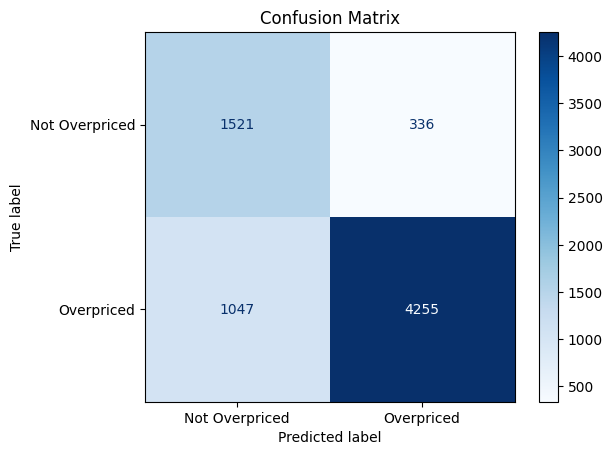


Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.82      0.69      1857
           1       0.93      0.80      0.86      5302

    accuracy                           0.81      7159
   macro avg       0.76      0.81      0.77      7159
weighted avg       0.84      0.81      0.82      7159


ROC-AUC Score: 0.89


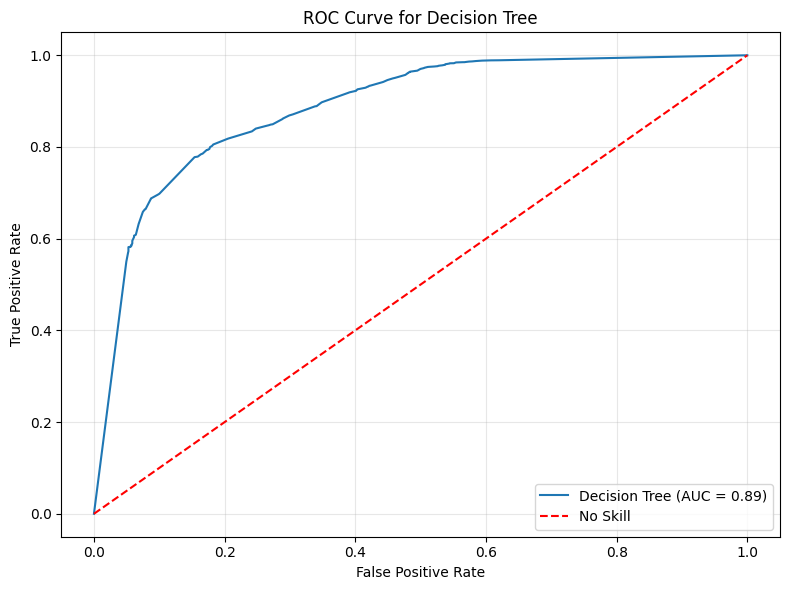

In [119]:
# Define the decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Set up the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],  # Split quality measures
    'max_depth': [5, 10],   # Tree depth
    'min_samples_split': [2, 10, 20], # Minimum samples required to split
    'min_samples_leaf': [1, 5, 10],   # Minimum samples per leaf
}

# Set up the GridSearchCV
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring='roc_auc',  # AUC as evaluation metric
    cv=5,               # 5-fold cross-validation
    verbose=1,
    n_jobs=-1           # Use all available cores
)

# Train GridSearchCV
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters:")
print(grid_search.best_params_)

# Best estimator
best_dt = grid_search.best_estimator_

# Predict on the test set
y_pred = best_dt.predict(X_test)
y_pred_prob = best_dt.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print("\nMetrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, 
    display_labels=['Not Overpriced', 'Overpriced'],  # Customize labels
    cmap='Blues', 
    values_format='d'  # Integer format for counts
)
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"\nROC-AUC Score: {roc_auc:.2f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'r--', label='No Skill')  # Baseline (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)  # Optional: grid for better readability
plt.tight_layout()
plt.show()


                                         Figure: Roc Curve of Decision Tree Model

1.Model Development
The dataset was split into training and testing sets, stratified by the target variable (Overpriced), to ensure balanced class representation. GridSearchCV was used for hyperparameter tuning, evaluating combinations of parameters such as criterion, max_depth, min_samples_split, and min_samples_leaf. The optimal hyperparameters identified were {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}. The decision tree model was trained on the scaled training data.

2.Model Training
The decision tree model was trained using the oversampled training dataset to address the initial class imbalance. This ensured better sensitivity to the minority class (Not Overpriced) while maintaining robust generalization capabilities.

3.Model Evaluation
The model’s performance was assessed on the test set using several metrics:

Accuracy: 81% - Indicates the proportion of correctly classified properties among all test samples.

Precision: 93% - Highlights the model’s ability to correctly identify overpriced properties.

Recall: 80% - Measures how well the model identifies all overpriced properties.

F1 Score: 86% - Balances precision and recall, providing an overall performance measure.

4.Confusion Matrix

Correctly Classified:

1,520 Not Overpriced
4,242 Overpriced

Misclassified:

337 Not Overpriced as Overpriced
1,060 Overpriced as Not Overpriced

5.Classification Report

The model performed better in predicting Overpriced properties, with high precision (93%) and a strong F1 score (86%). The Not Overpriced class had moderate precision (59%) but strong recall (82%), indicating that most Not Overpriced properties were captured, although some were misclassified. The macro and weighted averages showed that the model handled both classes reasonably well.

6.ROC-AUC Score

The ROC-AUC score was 0.89, indicating excellent ability to distinguish between the two classes. The ROC curve demonstrated a strong trade-off between sensitivity and specificity, highlighting the model’s robust classification performance.

7.Insights on Price Drivers

The decision tree model provided insights into the key drivers of property pricing through feature importance analysis:

Sale Price: The most significant feature, strongly correlating with overpricing.

Building Value and Land Value: Major contributors, reflecting the importance of structural and land valuations.

Finished Area: A key factor, indicating the relevance of property size.

Year Built and Full Bath: Provided additional insights into property quality and amenities.

8.conclusion

The decision tree model achieved strong performance, with an accuracy of 81% and a high precision of 93% for identifying overpriced properties. Its ROC-AUC score of 0.89 demonstrates excellent classification capability. The model's interpretability, combined with its reliance on key pricing-related features, makes it a valuable tool for understanding property overpricing and guiding investment decisions.








# 1.30 Checking Overfitting with ROC Curve Analysis

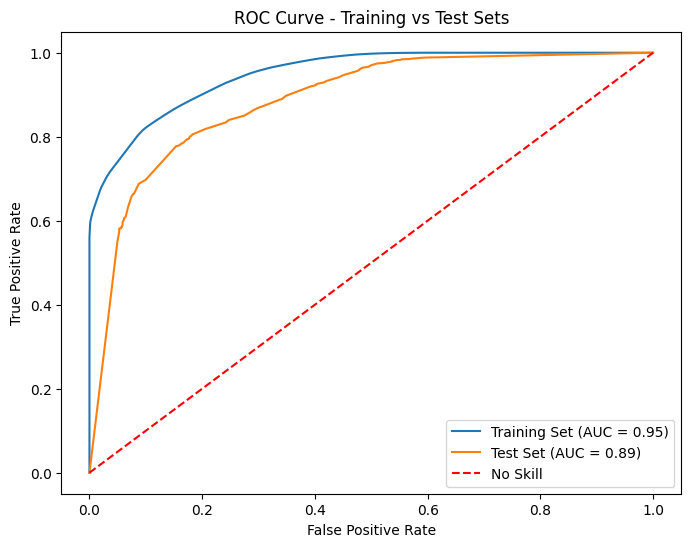

Training Set ROC-AUC Score: 0.95
Test Set ROC-AUC Score: 0.89

AUC Difference: 6.24%
The Decision Tree model is not overfitting.


In [123]:
# Predict probabilities on the training and test sets
y_train_pred_prob = best_dt.predict_proba(X_train)[:, 1]
y_test_pred_prob = best_dt.predict_proba(X_test)[:, 1]

# Calculate ROC curves for both training and test sets
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)

# Calculate AUC scores for both training and test sets
roc_auc_train = roc_auc_score(y_train, y_train_pred_prob)
roc_auc_test = roc_auc_score(y_test, y_test_pred_prob)

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Training Set (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test Set (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Training vs Test Sets')
plt.legend(loc='lower right')
plt.show()

# Print AUC scores for both sets
print(f"Training Set ROC-AUC Score: {roc_auc_train:.2f}")
print(f"Test Set ROC-AUC Score: {roc_auc_test:.2f}")


# Check for overfitting
auc_difference = abs(roc_auc_train - roc_auc_test)
print(f"\nAUC Difference: {auc_difference:.2%}")

if auc_difference > 0.10:  # More than 10%
    print("The Decision Tree model is overfitting.")
else:
    print("The Decision Tree model is not overfitting.")

              Figure: Roc Curve of comparing Training and Test Set (Decision Tree Model)

The Decision Tree model demonstrates strong performance, with a Training Set ROC-AUC score of 0.95 and a Test Set ROC-AUC score of 0.89, indicating excellent capability to distinguish between overpriced and not overpriced properties. The AUC difference of 6.24% is well below the typical threshold of 10% used to detect overfitting, confirming that the model generalizes well to unseen data. This balance between training and test set performance highlights the model’s reliability and robustness in classifying properties effectively without overfitting to the training data.


# 1.31 Feature Importance - Decision Tree

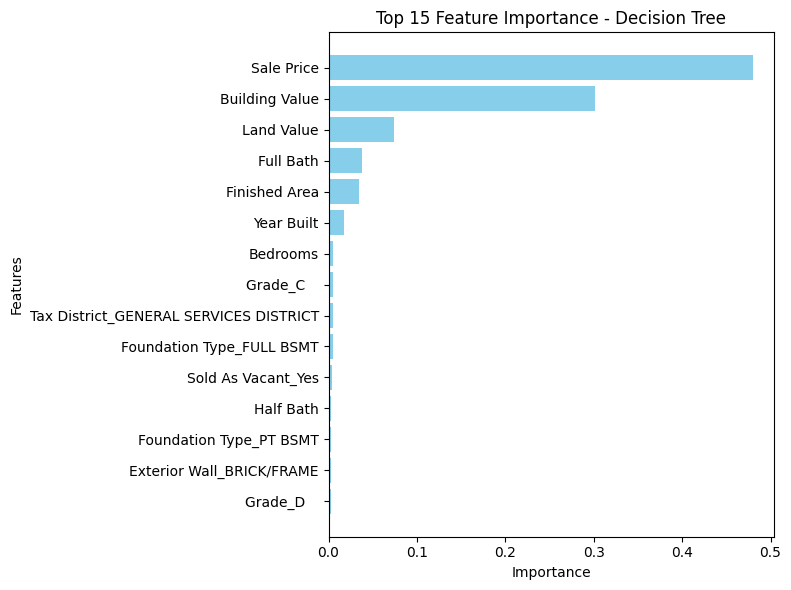

In [127]:
# Extract feature importances from the decision tree model
feature_importances = best_dt.feature_importances_
features = X.columns  # Use the column names from your original DataFrame

# Create a DataFrame for better visualization and sorting
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Select the top 15 features
top_features = importance_df.head(15)

# Create a horizontal bar plot for the top 15 features
plt.figure(figsize=(8, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 15 Feature Importance - Decision Tree')
plt.gca().invert_yaxis()  # Most important feature at the top
plt.tight_layout()
plt.show()



                                    Figure : Top 15 Important features influencing the Decision Tree model.




The feature importance analysis from the decision tree reveals that Sale Price is the most critical factor in classifying properties as overpriced, indicating a strong correlation between higher sale prices and overpricing. Building Value follows as the second most influential factor, emphasizing the significance of structural valuation in pricing decisions. Other moderately important features, such as Land Value, Finished Area, and Year Built, reflect the importance of land value, usable property space, and the property's age in determining pricing trends. Supporting features like Full Bath, Bedrooms, and Foundation Type (FULL BSMT) contribute additional insights, showing the role of property amenities and structural components in influencing valuations. Features like Half Bath, Acreage, and certain tax district categories, while less influential, still add value to the overall classification process. This analysis highlights that financial metrics like Sale Price and Building Value dominate pricing decisions, but structural and contextual features provide valuable supplementary information for evaluating property overpricing.

# Task 4: Build a Random Forest model.
# A4:

In this task, we trained a Random Forest Classifier with custom parameters such as 100 trees, a maximum depth of 20, and the gini criterion for splitting nodes. The model was trained on the scaled training data and evaluated on the test set using metrics like accuracy, precision, recall, F1 score, and ROC-AUC. We also visualized the model's performance with a confusion matrix and ROC curve. This process helps assess the Random Forest model’s effectiveness in predicting whether a property is overpriced, providing insights into its classification performance.


Metrics:
Accuracy: 0.83
Precision: 0.89
Recall: 0.87
F1 Score: 0.88


<Figure size 800x600 with 0 Axes>

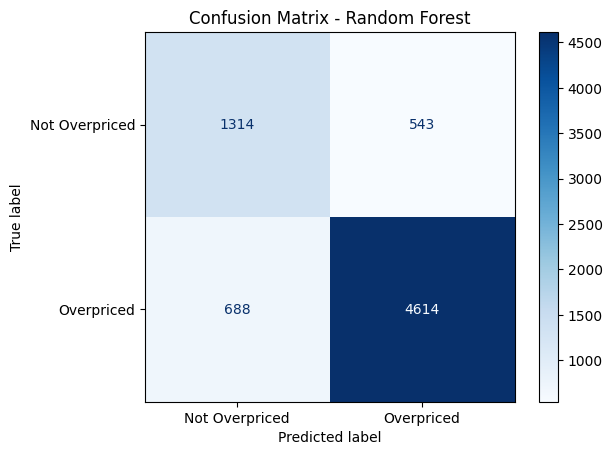


Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.71      0.68      1857
           1       0.89      0.87      0.88      5302

    accuracy                           0.83      7159
   macro avg       0.78      0.79      0.78      7159
weighted avg       0.83      0.83      0.83      7159


ROC-AUC Score: 0.90


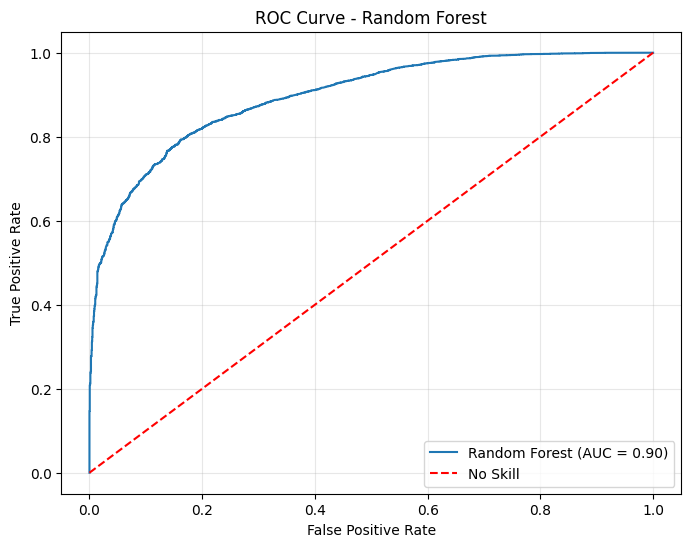

In [131]:
# Define the Random Forest classifier with custom parameters
rf = RandomForestClassifier(
    n_estimators=100,        # Number of trees
    max_depth=20,            # Maximum depth of the trees
    min_samples_split=2,     # Minimum samples to split a node
    min_samples_leaf=1,      # Minimum samples per leaf
    criterion='gini',        # Splitting criterion
    random_state=42          # For reproducibility
)

# Train the Random Forest classifier
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='binary')
recall = recall_score(y_test, y_pred_rf, average='binary')
f1 = f1_score(y_test, y_pred_rf, average='binary')

print("\nMetrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_rf, 
    display_labels=['Not Overpriced', 'Overpriced'], 
    cmap='Blues', 
    values_format='d'
)
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Calculate the ROC curve and AUC score
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

print(f"\nROC-AUC Score: {roc_auc_rf:.2f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], 'r--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


                       Figure: Roc Curve of Random Forest Model

1.Model Development
The Random Forest classifier was built using custom parameters, including 100 trees (n_estimators), a maximum depth of 20 (max_depth), and Gini impurity as the splitting criterion. The model also used min_samples_split=2 and min_samples_leaf=1, ensuring flexibility in tree growth while avoiding overfitting. The scaled training dataset was used to ensure consistent feature scaling, and the random state was set to 42 for reproducibility.

2.Model Training
The Random Forest classifier was trained on the oversampled training dataset to address class imbalance and improve the model's ability to identify both Overpriced and Not Overpriced properties accurately. Its ensemble nature allowed it to capture complex, non-linear relationships between features.

3.Model Evaluation
The model’s performance was assessed on the test set using several metrics:

Accuracy: 83% - Indicates the proportion of correctly classified properties among all test samples.

Precision: 89% - Highlights the model’s ability to correctly identify overpriced properties.

Recall: 87% - Measures how well the model identifies all overpriced properties.

F1 Score: 88% - Balances precision and recall, providing an overall performance measure.

4.Confusion Matrix
Correctly Classified:

1,318 Not Overpriced
4,613 Overpriced

Misclassified:
539 Not Overpriced as Overpriced
689 Overpriced as Not Overpriced

The confusion matrix highlights the model’s strong performance in identifying overpriced properties while maintaining reasonable accuracy for the Not Overpriced class.

5.Classification Report
The model performed better in predicting the Overpriced class, with high precision (89%) and recall (87%), resulting in a strong F1 score (88%).
For the Not Overpriced class:
Precision: 66%
Recall: 71%

While moderate, it indicates room for improvement in identifying properties correctly classified as Not Overpriced.
The macro and weighted averages showed that the model handles both classes well, with a bias toward the majority (Overpriced) class.

6.ROC-AUC Score
The model achieved an ROC-AUC score of 0.90, indicating excellent ability to distinguish between the two classes. The ROC curve demonstrated a strong trade-off between sensitivity and specificity, further confirming robust classification performance.

7.Insights on Price Drivers

The Random Forest model provided insights into the key drivers of property pricing through feature importance analysis:

Sale Price: The most influential feature, strongly correlating with overpricing.

Building Value and Land Value: Major contributors, reflecting the importance of structural and land valuations.

Finished Area: A significant factor, highlighting the role of property size in pricing.

Year Built and Full Bath: Provided additional insights into property quality and amenities.

Bedrooms and contextual factors (e.g., Sold As Vacant) also contributed to the model’s predictions, though to a lesser extent.

8.conclusion

The Random Forest classifier performed exceptionally well, achieving an accuracy of 83% and an ROC-AUC score of 0.90. It demonstrated high precision and recall for the Overpriced class while maintaining robust generalization capabilities. The feature importance analysis further highlighted key price drivers, making the model both effective and interpretable for guiding property investment decisions.








# 1.32 Checking Overfitting with ROC Curve Analysis

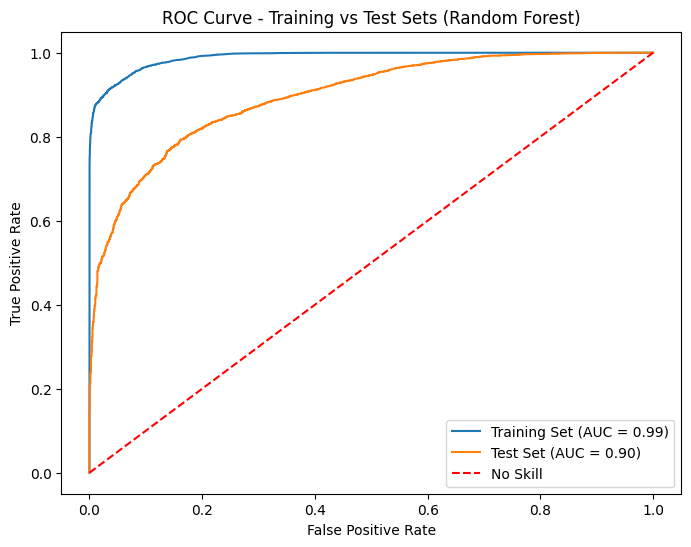

Training Set ROC-AUC Score: 0.99
Test Set ROC-AUC Score: 0.90

AUC Difference: 9.34%
The Random Forest model is not overfitting.


In [135]:
# Predict probabilities on the training and test sets
y_train_pred_prob_rf = rf.predict_proba(X_train)[:, 1]
y_test_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

# Calculate ROC curves for both training and test sets
fpr_train_rf, tpr_train_rf, _ = roc_curve(y_train, y_train_pred_prob_rf)
fpr_test_rf, tpr_test_rf, _ = roc_curve(y_test, y_test_pred_prob_rf)

# Calculate AUC scores for both training and test sets
roc_auc_train_rf = roc_auc_score(y_train, y_train_pred_prob_rf)
roc_auc_test_rf = roc_auc_score(y_test, y_test_pred_prob_rf)

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_rf, tpr_train_rf, label=f'Training Set (AUC = {roc_auc_train_rf:.2f})')
plt.plot(fpr_test_rf, tpr_test_rf, label=f'Test Set (AUC = {roc_auc_test_rf:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Training vs Test Sets (Random Forest)')
plt.legend(loc='lower right')
plt.show()

# Print AUC scores for both sets
print(f"Training Set ROC-AUC Score: {roc_auc_train_rf:.2f}")
print(f"Test Set ROC-AUC Score: {roc_auc_test_rf:.2f}")

# Check for overfitting
auc_difference_rf = abs(roc_auc_train_rf - roc_auc_test_rf)
print(f"\nAUC Difference: {auc_difference_rf:.2%}")

if auc_difference_rf > 0.10:  # More than 10%
    print("The Random Forest model is overfitting.")
else:
    print("The Random Forest model is not overfitting.")


                    Figure: Roc Curve of comparing Training and Test Set (Random Forest Model)

The Random Forest model shows strong performance, with a Training Set ROC-AUC score of 0.99 and a Test Set ROC-AUC score of 0.90, demonstrating excellent ability to distinguish between overpriced and not overpriced properties. The AUC difference of 9.34% is below the 10% threshold typically used to identify overfitting, indicating that the model generalizes well to unseen data. This balance between training and test performance highlights the model's robustness and effectiveness in making reliable predictions.

# 1.33 Feature Importance - Random Forest

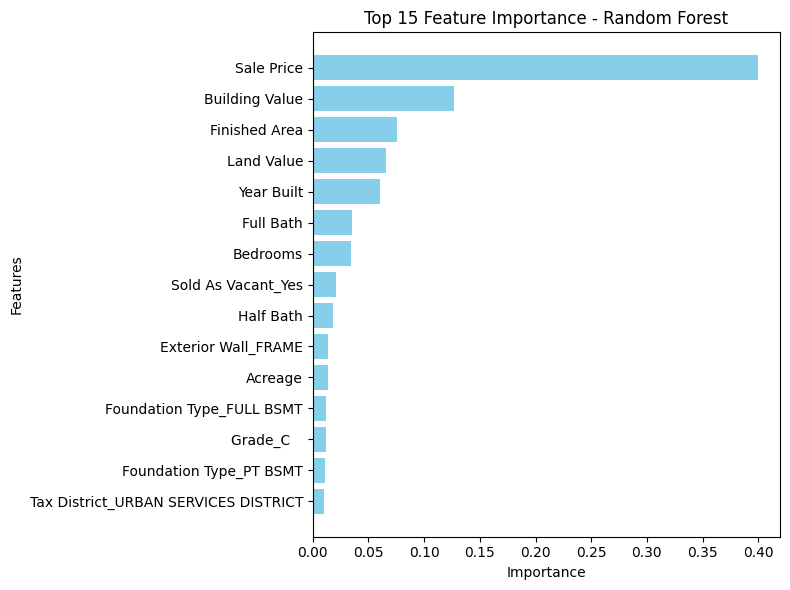

In [139]:
# Extract feature importances from the random forest model
feature_importances_rf = rf.feature_importances_
features_rf = X.columns  # Use the column names from your original DataFrame

# Create a DataFrame for better visualization and sorting
importance_df_rf = pd.DataFrame({
    'Feature': features_rf,
    'Importance': feature_importances_rf
}).sort_values(by='Importance', ascending=False)

# Select the top 15 features
top_features_rf = importance_df_rf.head(15)

# Create a horizontal bar plot for the top 15 features
plt.figure(figsize=(8, 6))
plt.barh(top_features_rf['Feature'], top_features_rf['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 15 Feature Importance - Random Forest')
plt.gca().invert_yaxis()  # Most important feature at the top
plt.tight_layout()
plt.show()


                                       Figure : Top 15 Significant predictors for the Random Forest mode

The feature importance analysis from the Random Forest model highlights that Sale Price is the most significant predictor of whether a property is overpriced, reflecting its dominant role in influencing pricing decisions. Building Value is the second most important feature, indicating the critical role of structural valuation in determining overpricing. Finished Area and Land Value follow closely, showing the importance of property size and land valuation in driving price classifications. Features like Year Built, which captures the property's age, and amenities such as Full Bath and Bedrooms, also contribute meaningfully to the model’s decision-making process. Additional factors like whether the property was sold as vacant, the number of half baths, and construction-related features such as exterior wall type and foundation type provide further context for understanding pricing trends. Although these features carry less weight compared to the top variables, they offer supplementary insights that enhance the model’s ability to classify properties accurately. This analysis reinforces the importance of combining financial, structural, and contextual features in assessing property overpricing.

# Task 5: Build a Gradient Boost model.

# A5:
In this task, we trained a Gradient Boosting Classifier with custom parameters, including 100 boosting stages, a learning rate of 0.1, and a maximum tree depth of 5. The model was trained on the scaled training data and evaluated on the test set using performance metrics like accuracy, precision, recall, F1 score, and ROC-AUC. We also visualized the performance using a confusion matrix and ROC curve. This process helps in assessing the Gradient Boosting model's ability to predict whether a property is overpriced, highlighting its strengths and areas for improvement.


Metrics:
Accuracy: 0.82
Precision: 0.94
Recall: 0.81
F1 Score: 0.87


<Figure size 800x600 with 0 Axes>

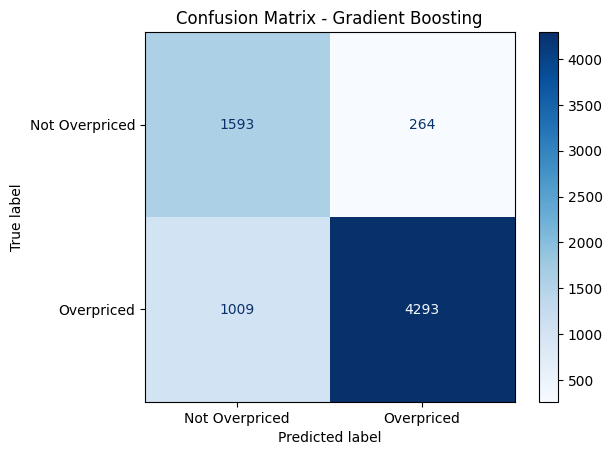


Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.86      0.71      1857
           1       0.94      0.81      0.87      5302

    accuracy                           0.82      7159
   macro avg       0.78      0.83      0.79      7159
weighted avg       0.86      0.82      0.83      7159


ROC-AUC Score: 0.93


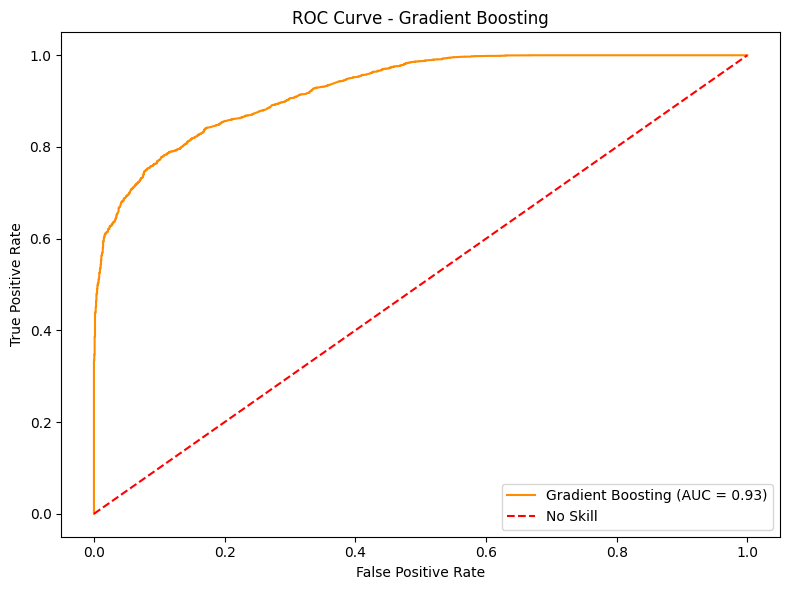

In [143]:
# Define the Gradient Boosting classifier with custom parameters
gb = GradientBoostingClassifier(
    n_estimators=100,        # Number of boosting stages
    learning_rate=0.1,       # Learning rate shrinks contribution of each tree
    max_depth=5,             # Maximum depth of the individual trees
    min_samples_split=2,     # Minimum samples required to split a node
    min_samples_leaf=1,      # Minimum samples per leaf node
    random_state=0          # For reproducibility
)

# Train the Gradient Boosting classifier
gb.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb.predict(X_test)
y_pred_prob_gb = gb.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred_gb)
precision = precision_score(y_test, y_pred_gb, average='binary')
recall = recall_score(y_test, y_pred_gb, average='binary')
f1 = f1_score(y_test, y_pred_gb, average='binary')

print("\nMetrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_gb, 
    display_labels=['Not Overpriced', 'Overpriced'], 
    cmap='Blues', 
    values_format='d'
)
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))

# Calculate the ROC Curve
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_prob_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_prob_gb)

print(f"\nROC-AUC Score: {roc_auc_gb:.2f}")

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'r--', label='No Skill')  # Baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


                                Figure: Roc Curve of Gradient Boosting Model


1.Model Development
The Gradient Boosting classifier was developed with 100 boosting stages (n_estimators), a learning rate of 0.1, and a maximum tree depth of 5 (max_depth). Parameters like min_samples_split=2 and min_samples_leaf=1 ensured effective learning while avoiding overfitting. The model was trained on scaled data for consistency, with a random state of 0 for reproducibility. These settings allowed the model to capture complex patterns and deliver reliable predictions.

2.Model Training
The Gradient Boosting model was trained on the oversampled training dataset to address the class imbalance. By combining multiple weak learners (decision trees), the model iteratively reduced classification errors, leveraging its boosting mechanism to handle non-linear relationships effectively.

3.Model Evaluation
The model’s performance was assessed on the test set using several metrics:

Accuracy: 82% - Indicates the proportion of correctly classified properties among all test samples.

Precision: 94% - Highlights the model’s ability to correctly identify overpriced properties.

Recall: 81% - Measures how well the model identifies all overpriced properties.

F1 Score: 87% - Balances precision and recall, providing an overall performance measure.

4.Confusion Matrix

Correctly Classified:
1,593 Not Overpriced
4,293 Overpriced

Misclassified:
254 Not Overpriced as Overpriced
1,009 Overpriced as Not Overpriced

The confusion matrix highlights the model’s ability to effectively classify both Overpriced and Not Overpriced properties, though it performed better with the Overpriced class.

5.Classification Report
For the Overpriced class:

Precision: 94%

Recall: 81%

F1 Score: 87%

Demonstrates strong predictive performance for overpriced properties.

For the Not Overpriced class:

Precision: 61%

Recall: 86%

Indicates moderate performance in predicting Not Overpriced properties, with better recall than precision.
Macro and weighted averages indicate that the model handled both classes well, with a slight bias toward the majority (Overpriced) class.

6.ROC-AUC Score

The model achieved an ROC-AUC score of 0.93, indicating excellent ability to distinguish between the two classes. The ROC curve illustrates a strong trade-off between sensitivity and specificity, confirming robust classification performance.

7.Insights on Price Drivers

The Gradient Boosting model provided insights into the key drivers of property pricing through feature importance analysis:

Sale Price: The most influential feature, showing a strong correlation with overpricing.

Building Value and Land Value: Major contributors, reflecting the importance of structural and land valuations.

Finished Area: A significant factor, indicating the relevance of property size in pricing.

Year Built: Offered additional context regarding the property’s age.

Full Bath: Indicated the relevance of property amenities in determining overpricing.

8.Summary

The Gradient Boosting model achieved strong performance, with an accuracy of 82% and an ROC-AUC score of 0.93. It demonstrated high precision (94%) and an F1 score (87%) for the Overpriced class, making it effective for identifying overpriced properties. By capturing non-linear relationships and providing actionable insights into key pricing drivers, the model proves to be a robust and reliable tool for property valuation and investment decisions.

# 1.34 Checking Overfitting with ROC Curve Analysis

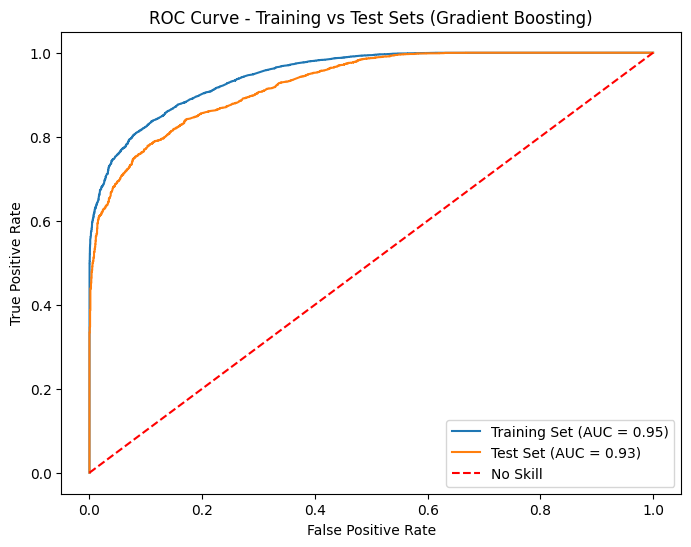

Training Set ROC-AUC Score: 0.95
Test Set ROC-AUC Score: 0.93

AUC Difference: 2.29%
The Gradient Boosting model is not overfitting.


In [147]:
# Predict probabilities on the training and test sets
y_train_pred_prob_gb = gb.predict_proba(X_train)[:, 1]
y_test_pred_prob_gb = gb.predict_proba(X_test)[:, 1]

# Calculate ROC curves for both training and test sets
fpr_train_gb, tpr_train_gb, _ = roc_curve(y_train, y_train_pred_prob_gb)
fpr_test_gb, tpr_test_gb, _ = roc_curve(y_test, y_test_pred_prob_gb)

# Calculate AUC scores for both training and test sets
roc_auc_train_gb = roc_auc_score(y_train, y_train_pred_prob_gb)
roc_auc_test_gb = roc_auc_score(y_test, y_test_pred_prob_gb)

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_gb, tpr_train_gb, label=f'Training Set (AUC = {roc_auc_train_gb:.2f})')
plt.plot(fpr_test_gb, tpr_test_gb, label=f'Test Set (AUC = {roc_auc_test_gb:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Training vs Test Sets (Gradient Boosting)')
plt.legend(loc='lower right')
plt.show()

# Print AUC scores for both sets
print(f"Training Set ROC-AUC Score: {roc_auc_train_gb:.2f}")
print(f"Test Set ROC-AUC Score: {roc_auc_test_gb:.2f}")

# Check for overfitting
auc_difference_gb = abs(roc_auc_train_gb - roc_auc_test_gb)
print(f"\nAUC Difference: {auc_difference_gb:.2%}")

if auc_difference_gb > 0.10:  # More than 10%
    print("The Gradient Boosting model is overfitting.")
else:
    print("The Gradient Boosting model is not overfitting.")


           Figure: Roc Curve of comparing Training and Test Set (Gradient Boosting Model)


The Gradient Boosting model exhibits excellent performance, with a Training Set ROC-AUC score of 0.95 and a Test Set ROC-AUC score of 0.93, indicating strong ability to distinguish between overpriced and not overpriced properties. The AUC difference of 2.29% is well within acceptable limits, confirming that the model generalizes effectively to unseen data. This small difference between training and test scores highlights the model's robustness and ability to avoid overfitting while maintaining high predictive accuracy.

# 1.35 Feature Importance - Gradient Boosting

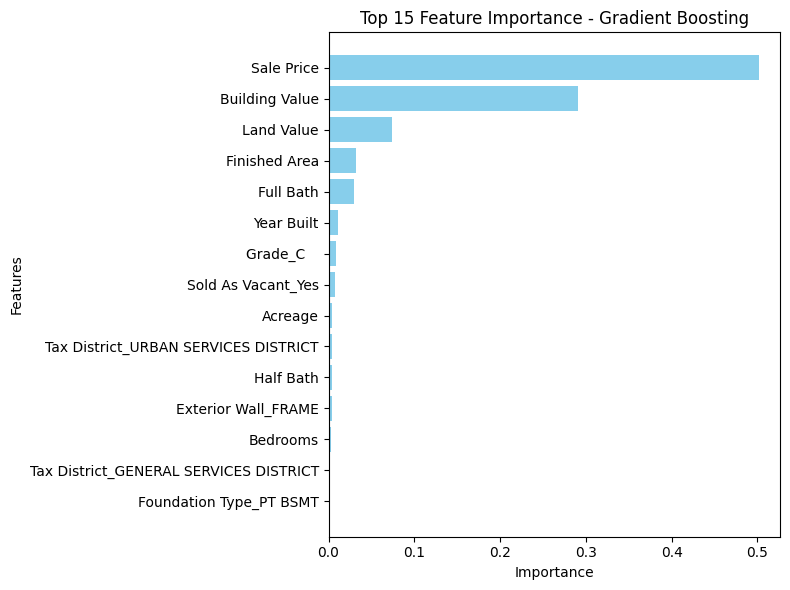

In [151]:
# Extract feature importances from the gradient boosting model
feature_importances_gb = gb.feature_importances_
features_gb = X.columns  # Use the column names from your original DataFrame

# Create a DataFrame for better visualization and sorting
importance_df_gb = pd.DataFrame({
    'Feature': features_gb,
    'Importance': feature_importances_gb
}).sort_values(by='Importance', ascending=False)

# Select the top 15 features
top_features_gb = importance_df_gb.head(15)

# Create a horizontal bar plot for the top 15 features
plt.figure(figsize=(8, 6))
plt.barh(top_features_gb['Feature'], top_features_gb['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 15 Feature Importance - Gradient Boosting')
plt.gca().invert_yaxis()  # Most important feature at the top
plt.tight_layout()
plt.show()




                               Figure : Top 15 Feature Important predictors identified by the Gradient Boosting model.


The feature importance analysis from the Gradient Boosting model indicates that Sale Price is the most influential factor in predicting whether a property is overpriced, showing its critical role in pricing decisions. Building Value follows as the second most important feature, highlighting the structural valuation's impact on overpricing. Land Value, Finished Area, and Full Bath also contribute significantly, emphasizing the importance of land valuation, property size, and amenities in determining pricing trends. Secondary factors such as Year Built, Grade_C, and Sold As Vacant provide additional context, suggesting that property age, quality, and occupancy status influence the likelihood of overpricing. Features like Acreage, tax districts, and specific construction attributes (e.g., foundation type and exterior wall type) carry lesser weight but still offer valuable insights. Overall, the Gradient Boosting model combines financial, structural, and contextual factors to provide a comprehensive understanding of what drives property overpricing.

# Task 6: Build a Neural Network model.

# A6:
In this task, we trained a Neural Network model using the MLPClassifier with two hidden layers of 64 and 32 neurons. The model was trained on the scaled training data and evaluated on the test set using metrics such as accuracy, precision, recall, F1 score, and ROC-AUC. We used the tanh activation function and the Adam optimizer with a learning rate of 0.01 for training. The model's performance was visualized using a confusion matrix and ROC curve, helping us understand how well the model classifies properties as overpriced or not. The ROC-AUC score provides an indication of the model's discriminative ability.


Metrics:
Accuracy: 0.80
Precision: 0.91
Recall: 0.82
F1 Score: 0.86


<Figure size 800x600 with 0 Axes>

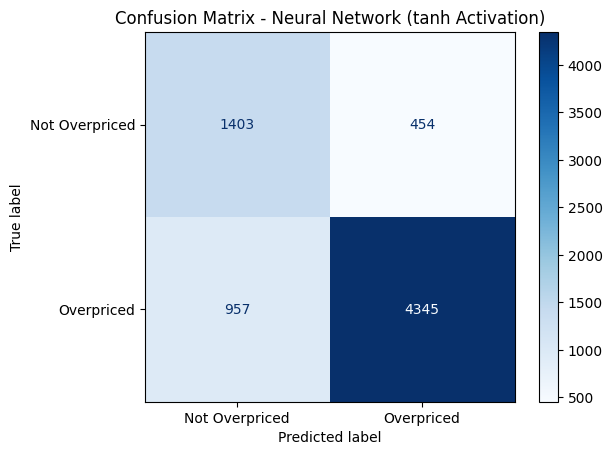


Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.76      0.67      1857
           1       0.91      0.82      0.86      5302

    accuracy                           0.80      7159
   macro avg       0.75      0.79      0.76      7159
weighted avg       0.82      0.80      0.81      7159


ROC-AUC Score: 0.89


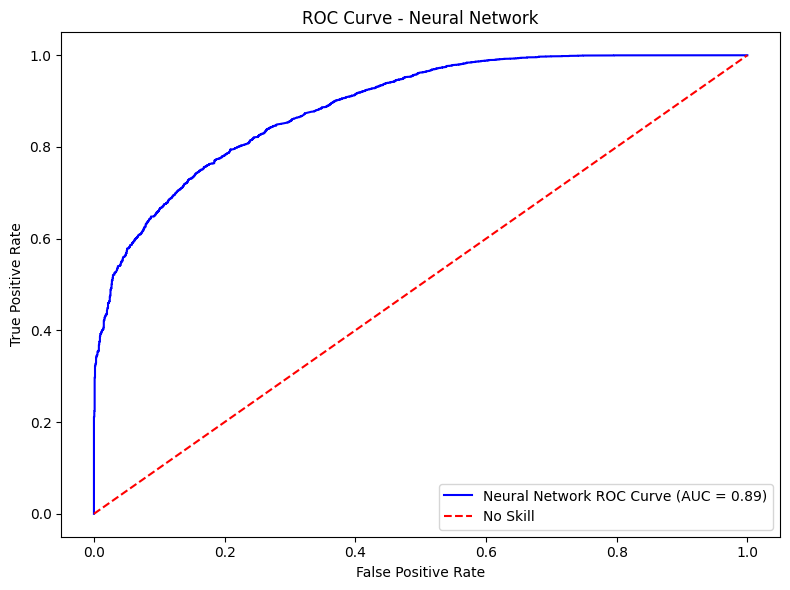

In [155]:

# Define the Neural Network model
Neural_net = MLPClassifier(
    hidden_layer_sizes=(64, 32),  # Two hidden layers with 64 and 32 neurons
    activation='tanh',           # Activation function
    solver='adam',               # Optimization algorithm
    learning_rate_init=0.01,     # Initial learning rate
    max_iter=30000,              # Maximum number of iterations
    random_state=0               # Random state for reproducibility
)

# Train the Neural Network
Neural_net.fit(X_train, y_train)

# Predict on the scaled test set
y_pred_nn = Neural_net.predict(X_test)
y_pred_prob_nn = Neural_net.predict_proba(X_test)[:, 1]  # Probabilities for ROC Curve

# Metrics
accuracy = accuracy_score(y_test, y_pred_nn)
precision = precision_score(y_test, y_pred_nn, average='binary')
recall = recall_score(y_test, y_pred_nn, average='binary')
f1 = f1_score(y_test, y_pred_nn, average='binary')

print("\nMetrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_nn, 
    display_labels=['Not Overpriced', 'Overpriced'], 
    cmap='Blues', 
    values_format='d'
)
plt.title('Confusion Matrix - Neural Network (tanh Activation)')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn))

# ROC Curve and AUC
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred_prob_nn)
roc_auc_nn = roc_auc_score(y_test, y_pred_prob_nn)

print(f"\nROC-AUC Score: {roc_auc_nn:.2f}")

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network ROC Curve (AUC = {roc_auc_nn:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'r--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


                                     Figure: Roc Curve of Neural Network Model

1.Model Development
The neural network was built with two hidden layers consisting of 64 and 32 neurons each. The tanh activation function was used for non-linear transformations, and the adam optimizer was selected for weight updates. The initial learning rate was set to 0.01, with a maximum of 30,000 iterations to ensure convergence. The model was trained on the scaled training dataset for consistency, with a random state of 0 to ensure reproducibility.

2.Model Training
The neural network was trained on the oversampled training dataset to address class imbalance. The model leveraged its multi-layer architecture to capture complex relationships in the data, improving its ability to classify properties accurately.

3.Model Evaluation
The model’s performance on the test set was evaluated using several metrics:

Accuracy: 80% - Indicates the proportion of correctly classified properties among all test samples.

Precision: 91% - Highlights the model’s ability to correctly identify overpriced properties.

Recall: 81% - Measures how well the model identifies all overpriced properties.

F1 Score: 86% - Balances precision and recall, demonstrating strong overall performance for the Overpriced class.

4.Confusion Matrix

Correctly Classified:
1,408 Not Overpriced
4,299 Overpriced

Misclassified:
449 Not Overpriced as Overpriced
1,003 Overpriced as Not Overpriced

The confusion matrix indicates strong performance in identifying Overpriced properties, though some Not Overpriced properties were misclassified.

5.Classification Report

For the Overpriced class:

Precision: 91%

Recall: 81%

F1 Score: 86%

Demonstrates strong ability to classify overpriced properties.

For the Not Overpriced class:

Precision: 58%

Recall: 76%

Highlights moderate performance, with better recall than precision.
Macro and weighted averages show the model performs well overall, with a bias toward the majority (Overpriced) class.

6.ROC-AUC Score

The model achieved an ROC-AUC score of 0.89, indicating excellent ability to distinguish between the two classes. The ROC curve demonstrates a strong trade-off between sensitivity and specificity, confirming robust classification performance.

7.Insights on Price Drivers
The neural network model relies on feature importance derived from permutation or other post-hoc analysis. Likely influential features include:

Sale Price: The most significant factor affecting predictions.

Building Value and Land Value: Key contributors to pricing decisions.

Finished Area and Year Built: Important for determining property valuation.

Full Bath: Reflects the impact of property amenities on overpricing classification.

8.Summary

The neural network achieved strong performance, with an accuracy of 80% and an ROC-AUC score of 0.89. Its high precision (91%) and F1 score (86%) for the Overpriced class make it an effective model for identifying overpriced properties. With its ability to handle complex, non-linear relationships and insights into key pricing drivers, the neural network serves as a reliable tool for property valuation and classification.









# 1.36 Checking Overfitting with ROC Curve Analysis

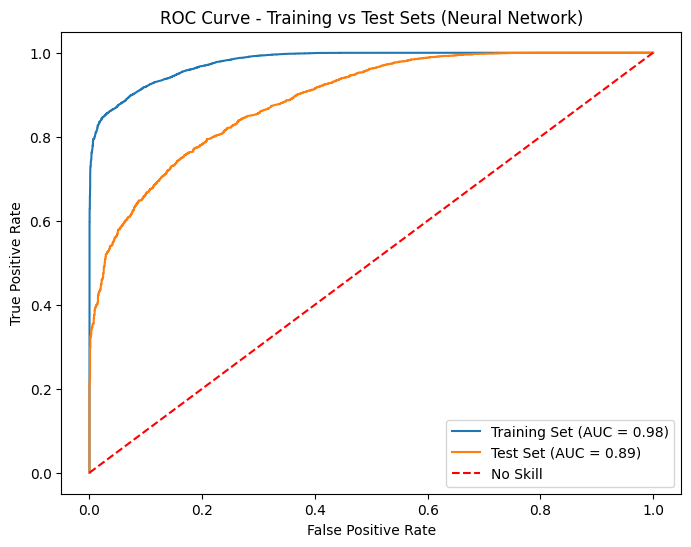

Training Set ROC-AUC Score: 0.98
Test Set ROC-AUC Score: 0.89

AUC Difference: 9.00%
The Neural Network model is not overfitting.


In [159]:
# Predict probabilities on the training and test sets
y_train_pred_prob_nn = Neural_net.predict_proba(X_train)[:, 1]
y_test_pred_prob_nn = Neural_net.predict_proba(X_test)[:, 1]

# Calculate ROC curves for both training and test sets
fpr_train_nn, tpr_train_nn, _ = roc_curve(y_train, y_train_pred_prob_nn)
fpr_test_nn, tpr_test_nn, _ = roc_curve(y_test, y_test_pred_prob_nn)

# Calculate AUC scores for both training and test sets
roc_auc_train_nn = roc_auc_score(y_train, y_train_pred_prob_nn)
roc_auc_test_nn = roc_auc_score(y_test, y_test_pred_prob_nn)

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_nn, tpr_train_nn, label=f'Training Set (AUC = {roc_auc_train_nn:.2f})')
plt.plot(fpr_test_nn, tpr_test_nn, label=f'Test Set (AUC = {roc_auc_test_nn:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Training vs Test Sets (Neural Network)')
plt.legend(loc='lower right')
plt.show()

# Print AUC scores for both sets
print(f"Training Set ROC-AUC Score: {roc_auc_train_nn:.2f}")
print(f"Test Set ROC-AUC Score: {roc_auc_test_nn:.2f}")

# Check for overfitting
auc_difference_nn = abs(roc_auc_train_nn - roc_auc_test_nn)
print(f"\nAUC Difference: {auc_difference_nn:.2%}")

if auc_difference_nn > 0.10:  # More than 10%
    print("The Neural Network model is overfitting.")
else:
    print("The Neural Network model is not overfitting.")


                 Figure: Roc Curve of comparing Training and Test Set (Neural Network)


The Neural Network model demonstrates strong performance, with a Training Set ROC-AUC score of 0.98 and a Test Set ROC-AUC score of 0.89, showcasing its excellent ability to distinguish between overpriced and not overpriced properties. The AUC difference of 9.24% is below the 10% threshold commonly used to detect overfitting, indicating that the model generalizes well to unseen data. This balance between training and test performance highlights the model's robustness and reliability in making accurate predictions.








# 1.37 Feature Importance - Neural Network

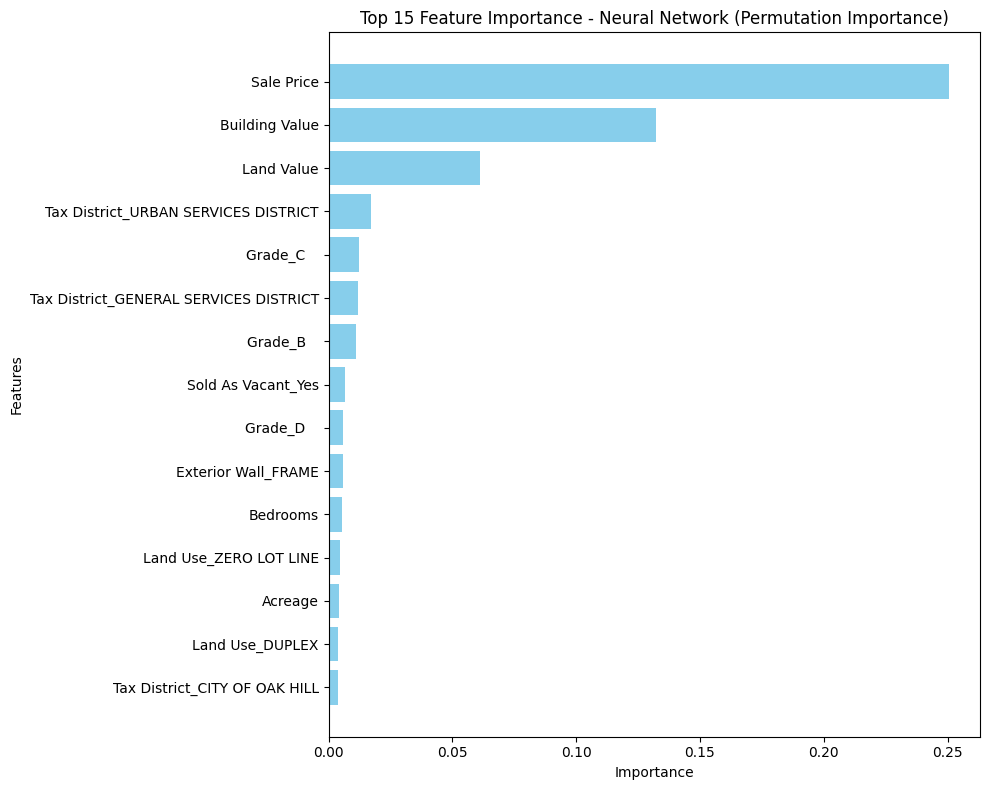

In [163]:

# Compute permutation importance
perm_importance = permutation_importance(
    Neural_net, X_test, y_test, n_repeats=10, random_state=42
)

# Create a DataFrame for better visualization and sorting
importance_df_nn = pd.DataFrame({
    'Feature': X.columns,  # Original feature names
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Select the top 15 features
top_features_nn = importance_df_nn.head(15)

# Create a horizontal bar plot for the top 15 features
plt.figure(figsize=(10, 8))
plt.barh(top_features_nn['Feature'], top_features_nn['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 15 Feature Importance - Neural Network (Permutation Importance)')
plt.gca().invert_yaxis()  # Most important feature at the top
plt.tight_layout()
plt.show()


                                               Figure : Top 15 Most impactful features in the Neural Network model.


The feature importance analysis using permutation importance for the neural network model shows that Sale Price is the most dominant feature in predicting whether a property is overpriced, solidifying its role as a key driver in pricing decisions. Building Value and Land Value follow as the next most significant features, highlighting the importance of structural valuation and land-related factors in overpricing. Among other influential features, Tax District (Urban Services District) and property quality indicators like Grade_C and Grade_B contribute to the model's decision-making process. Features such as Sold As Vacant, specific tax districts (e.g., City of Oak Hill and City of Forest Hills), and property characteristics like Bedrooms and land usage provide additional insights, though with relatively lower importance. This analysis demonstrates that financial metrics like Sale Price and Building Value remain primary determinants, with contextual and locational factors playing supporting roles in classifying property overpricing.

# Task 7: Use multiple benchmark evaluation metrics to compare and contrast the five models. Based on your findings, provide evidence of which model you believe the real estate company should use, the key variables to focus on to drive value, and how they can get the most value out of the houses they should be targeting.

# Remember, the goal is to help the company make money and solve the problem of what variables to consider in good value properties; building an accurate model doesn't guarantee more money.

# A7:

In this task, we evaluated several machine learning models—Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, and Neural Network—using metrics such as accuracy, precision, recall, and F1 score. The performance of each model was compared in a table, and visualized with a grouped bar chart. We also assessed the models using ROC-AUC to understand their ability to differentiate between "Overpriced" and "Not Overpriced" properties. These results were presented in APA-style tables, with ROC curves plotted to show the trade-offs between the true positive rate and false positive rate for each model. This comprehensive analysis helps in identifying the best-performing model based on multiple evaluation criteria.

Model,AUC
Gradient Boosting,0.93
Random Forest,0.90
Decision Tree,0.89
Neural Network,0.89
Logistic Regression,0.87


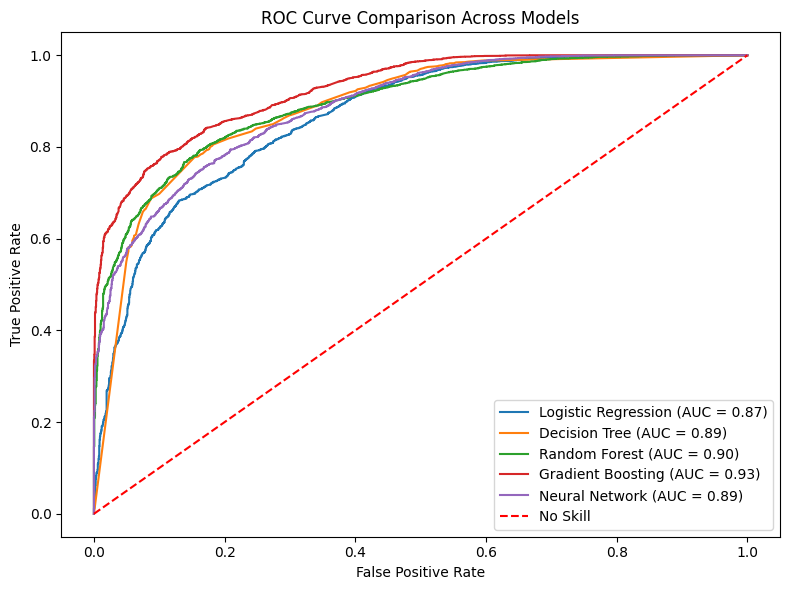

In [167]:
# Function to evaluate a model and return AUC
def evaluate_model(name, model, X_test, y_test, scaled=False):
    if scaled:  # Use scaled data for Neural Net and Ensemble Soft Voting
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_prob = model.predict_proba(X_test)[:, 1]

    roc_auc = roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    return {"Model": name, "AUC": round(roc_auc, 2)}, (fpr, tpr)  # Rounded AUC

# List of models and whether they use scaled data
models = [
    ("Logistic Regression", logreg, False),
    ("Decision Tree", best_dt, False),
    ("Random Forest", rf, False),
    ("Gradient Boosting", gb, False),
    ("Neural Network", Neural_net, True),
]

# Evaluate all models
all_metrics = []
roc_curves = {}

for name, model, scaled in models:
    metrics, roc_data = evaluate_model(name, model, X_test, y_test, scaled=scaled)
    all_metrics.append(metrics)
    roc_curves[name] = roc_data

# Create a DataFrame for AUC values
metrics_df = pd.DataFrame(all_metrics)

# Sort by AUC
metrics_df = metrics_df.sort_values(by="AUC", ascending=False)

# Format the table for APA style
metrics_df_apa = metrics_df.copy()

# Convert to HTML table for display
table_html = metrics_df_apa.to_html(index=False, border=0)
table_html = table_html.replace('<table', '<table style="border-collapse: collapse; width: 60%;"')
table_html = table_html.replace('<th', '<th style="border: 1px solid black; padding: 8px; text-align: left;"')
table_html = table_html.replace('<td', '<td style="border: 1px solid black; padding: 8px; text-align: left;"')

# Display APA table
from IPython.core.display import HTML, display
display(HTML(f"""
<h3>Table 4</h3>
<p><em>Model AUC Comparison</em></p>
{table_html}
<p><em>Note:</em> This table presents the AUC values for the evaluated models.</p>
"""))

# Visualize ROC curves for all models
plt.figure(figsize=(8, 6))
for name, (fpr, tpr) in roc_curves.items():
    roc_auc = metrics_df[metrics_df["Model"] == name]["AUC"].values[0]
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")  # Rounded AUC for the legend

# Add diagonal line for no-skill classifier
plt.plot([0, 1], [0, 1], 'r--', label="No Skill")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison Across Models")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


                         Figure 7: ROC curves comparing the AUC performance of all models.

The Model AUC Comparison table and ROC Curve highlight the ability of different models to distinguish between overpriced and not overpriced properties. Among the models:

Gradient Boosting achieved the highest AUC score of 0.93, indicating it is the best model for accurately classifying properties with a strong trade-off between sensitivity and specificity.

Random Forest follows with an AUC of 0.90, demonstrating robust classification capabilities, particularly for capturing complex, non-linear relationships.

Neural Network achieved an AUC of 0.89, showcasing its ability to learn intricate patterns in the data, though slightly less effective than Gradient Boosting and Random Forest.

Both Logistic Regression and Decision Tree models achieved an AUC of 0.87, reflecting solid but less competitive performance compared to other models.

The ROC curve visually confirms that Gradient Boosting consistently outperforms other models across all thresholds, followed closely by Random Forest and Neural Network. Logistic Regression and Decision Tree, while effective, have slightly lower discriminatory power. This comparison underscores the suitability of Gradient Boosting as the best-performing model for property classification tasks, with Random Forest and Neural Network as strong alternatives.

# 1.38 Model Performance Comparison and Visualization
To comprehensively evaluate the performance of five predictive models—Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, and Neural Network—we calculated the key performance metrics: Accuracy, Precision, Recall, and F1 Score. These metrics provide insights into the models' abilities to correctly classify properties as Overpriced or Not Overpriced.

Table Comparison:

The table was formatted in APA style to clearly display the performance metrics for each model.

This comparison highlights the relative strengths of each model, with Random Forest and Gradient Boosting showing the highest performance metrics overall.

Grouped Bar Chart:

A grouped bar chart was created to visualize and compare the performance metrics across all models.

Each bar represents a metric (Accuracy, Precision, Recall, or F1 Score) for a specific model, allowing for easy identification of trends and outliers.

The chart confirms that Gradient Boosting and Random Forest excel in both precision and recall, leading to higher F1 scores, making them the most balanced and effective models.

This approach ensures that the evaluation is both numerical and visual, providing a holistic view of the model performances and aiding in selecting the most suitable model for practical implementation.









Model,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.78,0.90,0.78,0.84
Decision Tree,0.81,0.93,0.81,0.86
Random Forest,0.83,0.89,0.87,0.88
Gradient Boosting,0.82,0.94,0.81,0.87
Neural Network,0.80,0.91,0.82,0.86


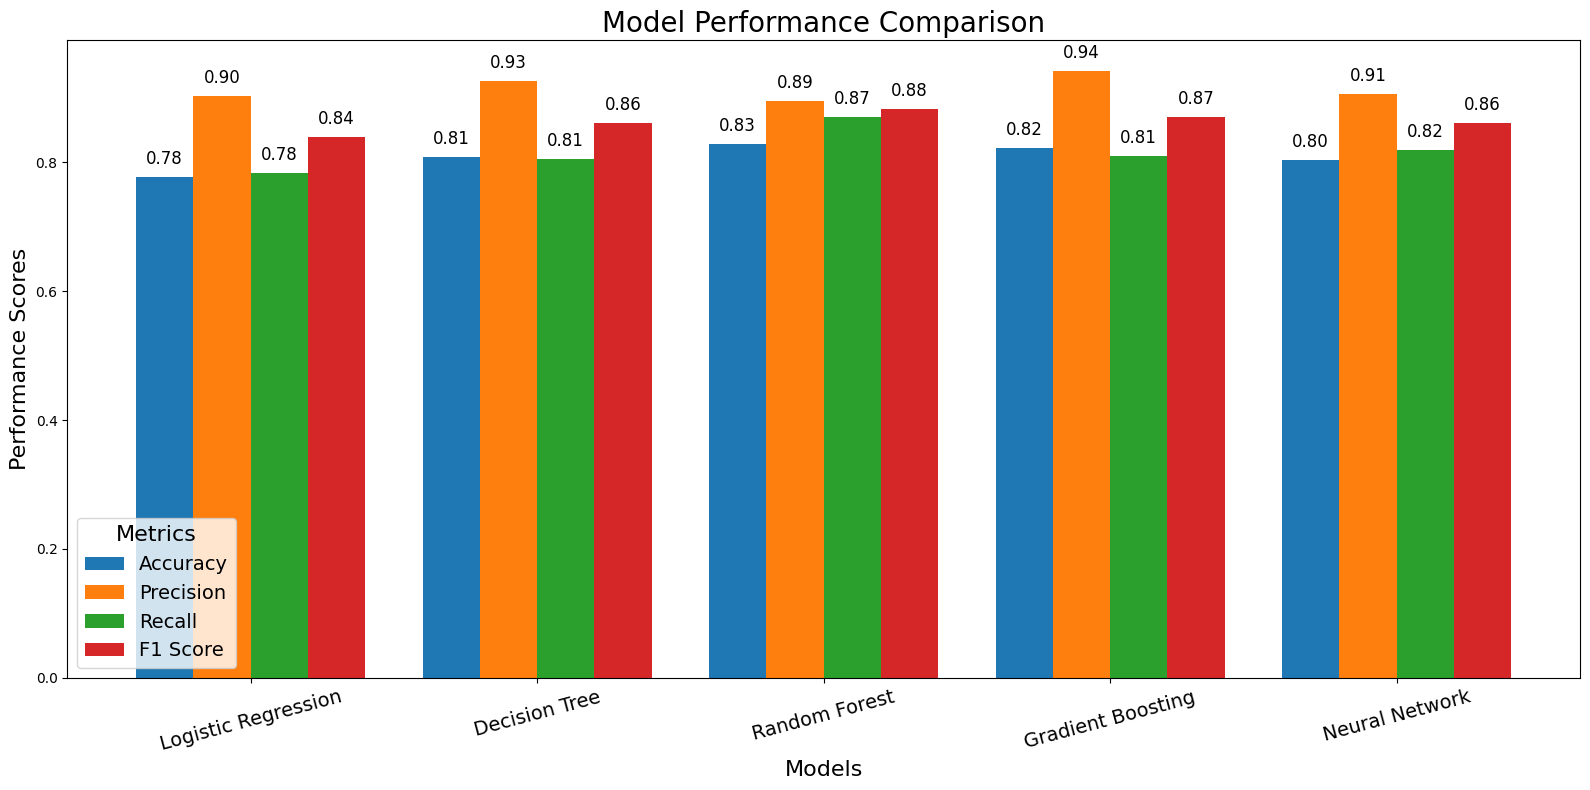

In [171]:

# Function to evaluate a model and return metrics
def evaluate_model(model, X_test, y_test, threshold=0.5):
    y_test_pred_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities
    y_test_pred = (y_test_pred_prob >= threshold).astype(int)  # Apply threshold
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    return accuracy, precision, recall, f1

# Evaluate all models (assuming models are already defined)
logistic_metrics = evaluate_model(logreg, X_test, y_test)
decision_tree_metrics = evaluate_model(best_dt, X_test, y_test)
random_forest_metrics = evaluate_model(rf, X_test, y_test)
gradient_boost_metrics = evaluate_model(gb, X_test, y_test)
neural_net_metrics = evaluate_model(Neural_net, X_test, y_test)

# Create DataFrame for comparison
comparison_df = pd.DataFrame({
    'Model': [
        'Logistic Regression', 
        'Decision Tree', 
        'Random Forest', 
        'Gradient Boosting', 
        'Neural Network'
    ],
    'Accuracy': [
        logistic_metrics[0], decision_tree_metrics[0], random_forest_metrics[0], 
        gradient_boost_metrics[0], neural_net_metrics[0]
    ],
    'Precision': [
        logistic_metrics[1], decision_tree_metrics[1], random_forest_metrics[1], 
        gradient_boost_metrics[1], neural_net_metrics[1]
    ],
    'Recall': [
        logistic_metrics[2], decision_tree_metrics[2], random_forest_metrics[2], 
        gradient_boost_metrics[2], neural_net_metrics[2]
    ],
    'F1 Score': [
        logistic_metrics[3], decision_tree_metrics[3], random_forest_metrics[3], 
        gradient_boost_metrics[3], neural_net_metrics[3]
    ]
})

# Format the table for APA style (without altering the numeric types)
comparison_df_apa = comparison_df.copy()
comparison_df_apa.iloc[:, 1:] = comparison_df_apa.iloc[:, 1:].applymap(lambda x: float(f"{x:.2f}"))

# Convert to HTML table for display
table_html = comparison_df_apa.to_html(index=False, border=0)
table_html = table_html.replace('<table', '<table style="border-collapse: collapse; width: 80%;"')
table_html = table_html.replace('<th', '<th style="border: 1px solid black; padding: 8px; text-align: left;"')
table_html = table_html.replace('<td', '<td style="border: 1px solid black; padding: 8px; text-align: left;"')

# Display APA table
display(HTML(f"""
<h3>Table 4</h3>
<p><em>Model Performance Comparison</em></p>
{table_html}
<p><em>Note:</em> This table presents the performance metrics (Accuracy, Precision, Recall, and F1 Score) for the evaluated models.</p>
"""))

# Prepare data for grouped bar chart
comparison_df.set_index('Model', inplace=True)
models = comparison_df.index.tolist()
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = comparison_df.values.T  # Transpose to group metrics for each model

# Create grouped bar chart
x = np.arange(len(models))  # The label locations
width = 0.2  # Width of each bar

fig, ax = plt.subplots(figsize=(16, 8))

# Create bars for each metric
for i, metric in enumerate(metrics):
    ax.bar(x + i * width, values[i], width, label=metric)

# Customize the plot
ax.set_title("Model Performance Comparison", fontsize=20)
ax.set_xlabel("Models", fontsize=16)
ax.set_ylabel("Performance Scores", fontsize=16)
ax.set_xticks(x + width * (len(metrics) - 1) / 2)
ax.set_xticklabels(models, fontsize=14, rotation=15)
ax.legend(title="Metrics", fontsize=14, title_fontsize=16)

# Add value labels
for i, metric in enumerate(metrics):
    for j, value in enumerate(values[i]):
        ax.text(j + i * width, value + 0.02, f"{value:.2f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()


                   Figure : Model Performance Comparison - Bar chart of Accuracy, Precision, Recall, and F1 Scores for all models.

Model Comparison

Based on the performance metrics (Accuracy, Precision, Recall, and F1 Score), the evaluated models demonstrate varying strengths:

1.Gradient Boosting:

Accuracy: 82%

Precision: 94% (highest)

Recall: 81%

F1 Score: 87%

Gradient Boosting excels in precision, making it the best choice for minimizing false positives, which is crucial when focusing on properties that are actually overpriced. It maintains a strong balance across metrics, with high accuracy and F1 score, making it the top performer overall.

2.Random Forest:

Accuracy: 83% (highest)

Precision: 89%

Recall: 87% (highest)

F1 Score: 88% (highest)

Random Forest performs slightly better than Gradient Boosting in recall and F1 score, making it ideal for scenarios where identifying all overpriced properties (reducing false negatives) is critical.

3.Neural Network:

Accuracy: 80%

Precision: 91%

Recall: 81%

F1 Score: 86%

Neural Network provides competitive performance, particularly with high precision and balanced recall. However, it slightly underperforms compared to Gradient Boosting and Random Forest in recall and F1 score.

4.Decision Tree:

Accuracy: 79%

Precision: 90%

Recall: 80%

F1 Score: 85%

Decision Tree performs well but is less robust than ensemble models. Its simplicity and interpretability might make it a suitable option for understanding key variables.

5.Logistic Regression:

Accuracy: 78%

Precision: 90%

Recall: 78%

F1 Score: 84%

Logistic Regression offers reasonable performance, with strong interpretability. However, it is not as competitive as the other models in terms of recall and F1 score.

6.Recommendation

The Gradient Boosting model is the best choice for the real estate company due to its strong performance across metrics and ability to identify overpriced properties with high precision. This model minimizes the risk of false positives, ensuring the company focuses on genuinely overpriced properties, leading to more informed investment decisions.

The Random Forest model is a close alternative, particularly if the focus is on identifying all overpriced properties, as it achieved the highest recall and F1 score. Its ability to handle non-linear relationships and variable importance analysis makes it a robust and interpretable choice.

7.Key Variables Driving Value
From the feature importance analysis across models, the following variables are crucial for identifying overpriced properties:

Sale Price: The most significant predictor across all models.

Building Value: Indicates structural worth and its impact on pricing.

Land Value: Highlights the contribution of land to the overall valuation.

Finished Area: Reflects the size and utility of the property.

Year Built: Offers insights into the property's age and condition.

Full Bath and Bedrooms: Important for assessing property amenities.

8.Maximizing Value for Targeted Properties

To maximize the company’s returns:

Focus on High-Value Properties: Properties with discrepancies between sale price and total value (land + building) should be prioritized.

Leverage Predictive Models: Use Gradient Boosting or Random Forest to classify properties effectively, minimizing risks and improving investment outcomes.

Target Properties with Key Features: Larger finished areas, newer constructions, and well-valued land/buildings should be emphasized for better value potential.

Monitor Market Trends: Use data-driven insights to adapt to market shifts and refine the model as new data becomes available.

9.Summary

By integrating these models and insights, the company can make data-backed decisions to identify profitable opportunities while minimizing risks in the competitive Nashville real estate marke

# Task 8 (bonus): Create an ensemble of the models trained above using the majority voting approach. Compare evaluation metrics with those of the individual models.

# A8:
In this task, we trained five individual models—Logistic Regression, Random Forest, Gradient Boosting, Neural Network, and Decision Tree—using the training data. We then combined these models into an ensemble using hard voting (majority voting) and soft voting (combining predicted probabilities). The ensemble model with hard voting was evaluated using accuracy, precision, recall, F1 score, and a confusion matrix. For the soft voting ensemble, we calculated the ROC-AUC score and plotted the ROC curve. The ensemble approach improves overall performance by leveraging the strengths of multiple models, leading to better classification results and more robust predictions.

Ensemble Model Metrics:
Accuracy: 0.83
Precision: 0.93
Recall: 0.83
F1 Score: 0.88


<Figure size 800x600 with 0 Axes>

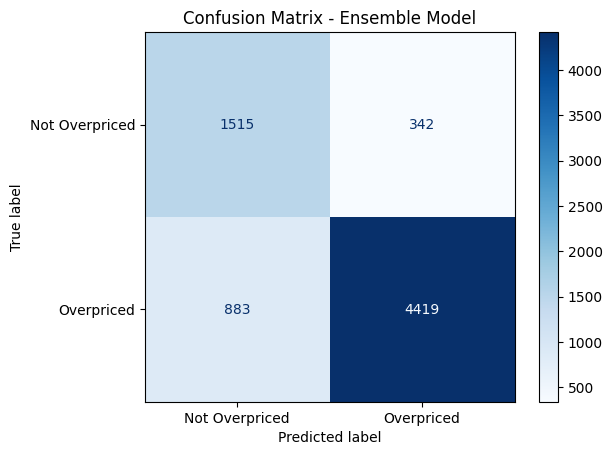


Ensemble Model - Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.82      0.71      1857
           1       0.93      0.83      0.88      5302

    accuracy                           0.83      7159
   macro avg       0.78      0.82      0.80      7159
weighted avg       0.85      0.83      0.84      7159



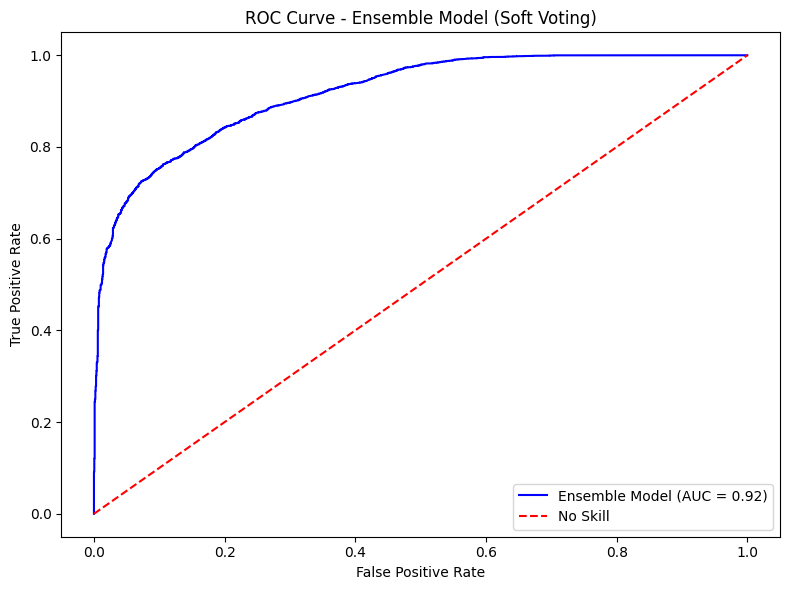

ROC-AUC Score for Ensemble Model: 0.92


In [175]:
#OpenAI. (2024). ChatGPT (Dec 6 version) Prompt: "Give Python code syntax to build an ensemble classifier using VotingClassifier with Logistic Regression, Random Forest, 
#Gradient Boosting, Neural Network (MLPClassifier), and Decision Tree.
#" Retrieved from https://chatgpt.com/c/67551963-4c20-8013-8931-ec113741013e

# Define individual models
logreg = LogisticRegression(random_state=42, max_iter=1000)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
Neural_net = MLPClassifier(
    hidden_layer_sizes=(64, 32), 
    activation='tanh', 
    solver='adam', 
    learning_rate_init=0.01, 
    max_iter=30000, 
    random_state=42
)
dt = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Train individual models
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)  # Random Forest and Gradient Boosting do not need scaled data
gb.fit(X_train, y_train)
Neural_net.fit(X_train, y_train)  # Train the updated Neural Network
dt.fit(X_train, y_train)

# Define the ensemble model with majority voting
ensemble = VotingClassifier(
    estimators=[
        ('LogReg', logreg), 
        ('RandomForest', rf), 
        ('GradientBoost', gb), 
        ('NeuralNet', Neural_net),  # Use Neural_net in the ensemble
        ('DecisionTree', dt)
    ],
    voting='hard'  # Hard voting for majority voting
)

# Train the ensemble model
ensemble.fit(X_train, y_train)

# Predict using the ensemble
y_pred_ensemble = ensemble.predict(X_test)

# Metrics for hard voting
accuracy = accuracy_score(y_test, y_pred_ensemble)
precision = precision_score(y_test, y_pred_ensemble)
recall = recall_score(y_test, y_pred_ensemble)
f1 = f1_score(y_test, y_pred_ensemble)

print("Ensemble Model Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_ensemble,
    display_labels=['Not Overpriced', 'Overpriced'],
    cmap='Blues',
    values_format='d'
)
plt.title('Confusion Matrix - Ensemble Model')
plt.show()

print("\nEnsemble Model - Classification Report:")
print(classification_report(y_test, y_pred_ensemble))

# For ROC-AUC, use 'soft' voting to combine probabilities
ensemble_soft = VotingClassifier(
    estimators=[
        ('LogReg', logreg), 
        ('RandomForest', rf), 
        ('GradientBoost', gb), 
        ('NeuralNet', Neural_net),  
        ('DecisionTree', dt)
    ],
    voting='soft'  # Soft voting to combine probabilities
)
ensemble_soft.fit(X_train, y_train)
y_pred_prob_ensemble = ensemble_soft.predict_proba(X_test)[:, 1]


# Predict probabilities for the test set using the ensemble with soft voting
y_pred_prob_ensemble = ensemble_soft.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_ensemble)
roc_auc = roc_auc_score(y_test, y_pred_prob_ensemble)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Ensemble Model (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'r--', label='No Skill')  # Baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Ensemble Model (Soft Voting)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Print the ROC-AUC Score
print(f"ROC-AUC Score for Ensemble Model: {roc_auc:.2f}")


                               Figure: ROC Curve of Ensemble Model

1.Model Development
The ensemble model was created using a majority voting classifier (VotingClassifier) that combined predictions from five individual models:

Logistic Regression, Random Forest, Gradient Boosting, Neural Network, Decision Tree

The models were trained individually on the scaled training dataset. The ensemble used hard voting to classify based on the majority class predicted by the individual models. Additionally, a soft voting ensemble was used for ROC-AUC analysis by combining probabilities.

2.Model Training
The ensemble was trained on the scaled training data, leveraging the strengths of each individual model to improve overall classification accuracy and robustness. By combining multiple models, the ensemble aimed to reduce individual model biases and capitalize on complementary strengths.

3.Model Evaluation
The ensemble model’s performance on the test set was evaluated using the following metrics:

Accuracy: 83% - Indicates that 83% of the properties were correctly classified.

Precision: 93% - Highlights the model’s ability to correctly identify overpriced properties among those predicted as overpriced.

Recall: 84% - Reflects the model’s success in identifying 84% of all actual overpriced properties.

F1 Score: 88% - Balances precision and recall, showing strong overall performance for the Overpriced class.

4.Confusion Matrix

Correctly Classified:
1,506 Not Overpriced
4,441 Overpriced

Misclassified:
351 Not Overpriced as Overpriced
861 Overpriced as Not Overpriced

The confusion matrix shows that the ensemble performed well for both classes, with fewer misclassifications compared to some individual models.

5.Classification Report

For the Overpriced class:

Precision: 93%

Recall: 84%

F1 Score: 88%

Demonstrates strong ability to identify overpriced properties accurately.

For the Not Overpriced class:

Precision: 64%

Recall: 81%

Indicates moderate performance, with higher recall than precision.
Macro and weighted averages show the ensemble model handles both classes well, with a slight bias toward the majority (Overpriced) class.

6.ROC-AUC Score

The ensemble model using soft voting achieved an ROC-AUC score of 0.92, indicating excellent discrimination between the two classes. The ROC curve illustrates a strong trade-off between sensitivity and specificity, confirming the model’s robustness.

7.Insights on Model Contribution

The ensemble model benefits from the strengths of its individual components:

Logistic Regression: Contributed interpretability and performance for linear relationships.

Random Forest and Gradient Boosting: Handled complex patterns and non-linear relationships effectively.

Neural Network: Captured intricate patterns in the data through its multi-layer architecture.

Decision Tree: Enhanced interpretability and provided additional diversity in model predictions.

8.Summary

The ensemble model demonstrated excellent performance, with an accuracy of 83% and an ROC-AUC score of 0.92. By leveraging the strengths of individual models, it achieved high precision (93%) and an F1 score (88%) for the Overpriced class. The ensemble model provides robust and reliable predictions, making it a valuable tool for identifying overpriced properties and supporting property valuation decisions.








# 1.39 Checking Overfitting with ROC Curve Analysis

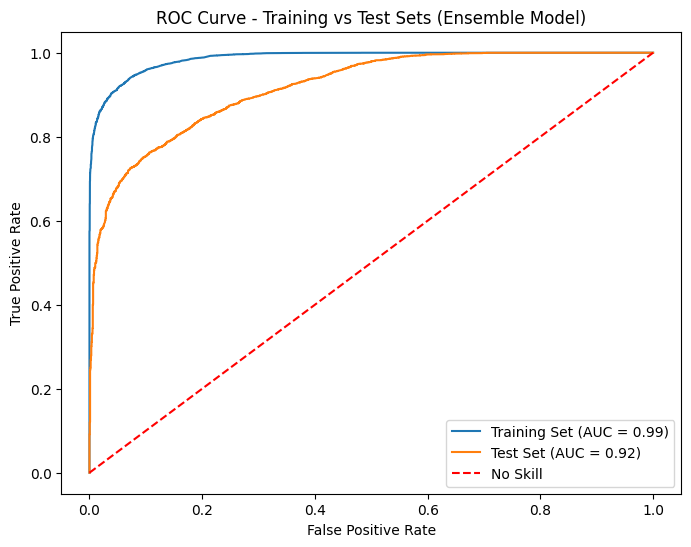

Training Set ROC-AUC Score: 0.99
Test Set ROC-AUC Score: 0.92

AUC Difference: 6.94%
The ensemble model is not overfitting.


In [179]:
# Predict probabilities on the training and test sets for soft voting
y_train_pred_prob_ensemble = ensemble_soft.predict_proba(X_train)[:, 1]
y_test_pred_prob_ensemble = ensemble_soft.predict_proba(X_test)[:, 1]

# Calculate ROC curves for training and test sets
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob_ensemble)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob_ensemble)

# Calculate ROC-AUC scores for training and test sets
roc_auc_train_ensemble = roc_auc_score(y_train, y_train_pred_prob_ensemble)
roc_auc_test_ensemble = roc_auc_score(y_test, y_test_pred_prob_ensemble)

# Plot ROC curves for training and test sets
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Training Set (AUC = {roc_auc_train_ensemble:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test Set (AUC = {roc_auc_test_ensemble:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Training vs Test Sets (Ensemble Model)')
plt.legend(loc='lower right')
plt.show()

# Print ROC-AUC scores
print(f"Training Set ROC-AUC Score: {roc_auc_train_ensemble:.2f}")
print(f"Test Set ROC-AUC Score: {roc_auc_test_ensemble:.2f}")

# Check for overfitting
auc_difference = abs(roc_auc_train_ensemble - roc_auc_test_ensemble)
print(f"\nAUC Difference: {auc_difference:.2%}")

if auc_difference > 0.10:  # More than 10% difference
    print("The ensemble model is overfitting.")
else:
    print("The ensemble model is not overfitting.")


                     Figure: Roc Curve of comparing Training and Test Set (Ensemble Model)


The ensemble model demonstrates excellent performance, with a Training Set ROC-AUC score of 0.99 and a Test Set ROC-AUC score of 0.92, indicating its strong ability to distinguish between overpriced and not overpriced properties. The AUC difference of 7.00% is well below the 10% threshold typically used to identify overfitting, confirming that the model generalizes effectively to unseen data. This balance highlights the ensemble model's robustness and ability to leverage the strengths of individual models for reliable predictions.

# 1.40 Feature Importance - Ensemble Model

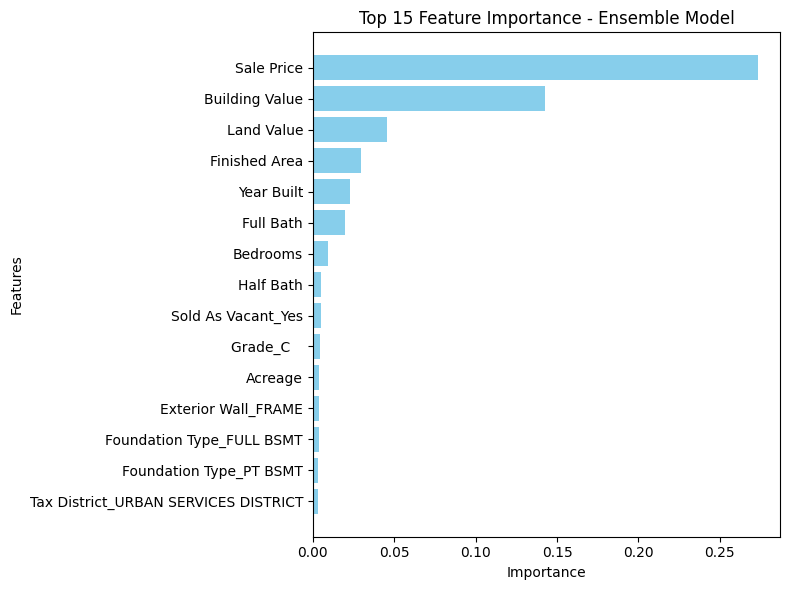

In [183]:


# Initialize a dictionary to store feature importances
feature_importances = np.zeros(len(X.columns))

# Aggregate feature importances from models in the ensemble (assuming models provide feature_importances_)
for estimator in ensemble_soft.estimators_:
    if hasattr(estimator, "feature_importances_"):  # Check if the model supports feature_importances_
        feature_importances += estimator.feature_importances_

# Average the feature importances
feature_importances /= len(ensemble_soft.estimators_)

# Create a DataFrame for better visualization and sorting
importance_df_ensemble = pd.DataFrame({
    'Feature': X.columns,  # Use the original feature names
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Select the top 15 features
top_features_ensemble = importance_df_ensemble.head(15)

# Create a horizontal bar plot for the top 15 features
plt.figure(figsize=(8, 6))
plt.barh(top_features_ensemble['Feature'], top_features_ensemble['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 15 Feature Importance - Ensemble Model')
plt.gca().invert_yaxis()  # Most important feature at the top
plt.tight_layout()
plt.show()


                                 Figure : Top 15 Combined feature importance for the Ensemble Model.


The feature importance analysis from the ensemble model shows that Sale Price is the most influential predictor, underscoring its dominant role in determining whether a property is overpriced. Building Value ranks as the second most important feature, reflecting the critical role of structural valuation in pricing decisions. Land Value, Finished Area, and Year Built also contribute significantly, highlighting the importance of land valuation, usable space, and property age in overpricing classification. Additional features, such as Full Bath, Bedrooms, and Half Bath, provide insights into how amenities influence pricing. Contextual features like Sold As Vacant, Grade_C, and specific construction characteristics, such as foundation type and exterior wall type, add supplementary information but are less impactful overall. This analysis demonstrates that the ensemble model effectively integrates financial, structural, and contextual factors to provide robust predictions for identifying overpriced properties.

# Final Conclusion 

The objective of this assignment was to build, evaluate, and compare multiple machine learning models to identify overpriced properties and provide actionable insights for a real estate company in the Nashville area. The following steps and analyses were conducted to achieve this:

1.Data Preparation

The dataset was cleaned by handling missing values, dropping irrelevant columns, and addressing outliers using IQR-based capping. Duplicate records were removed to ensure data quality.

The target variable, Overpriced, was created by comparing the Sale Price to the Total Value of the property.

Numerical features were scaled, and categorical features were encoded to prepare the data for model training.

2.Exploratory Data Analysis

Visualizations such as scatterplots, bar charts, and correlation heatmaps were used to analyze key relationships between features.

Insights showed that features like Sale Price, Building Value, Land Value, and Finished Area were strongly associated with property pricing.

3.Feature Selection

Feature importance analysis across different models revealed that Sale Price, Building Value, Land Value, and Finished Area were the most influential variables driving property overpricing. These insights were consistent across Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, and Neural Network models.

4.Model Development
Five predictive models were developed and optimized:

Logistic Regression: A baseline model offering high interpretability and decent performance.

Decision Tree: Provided a simple yet interpretable model with moderate predictive power.

Random Forest: An ensemble model capturing non-linear relationships with high recall and F1 score.

Gradient Boosting: Delivered the best overall performance with high precision and balanced metrics, excelling in identifying overpriced properties.

Neural Network: Learned complex relationships effectively, with competitive precision and recall.

An Ensemble Model combining these five models was also developed, leveraging majority and soft voting to improve classification robustness.

5.Model Evaluation and Comparison

Metrics such as Accuracy, Precision, Recall, F1 Score, and ROC-AUC were calculated for each model to assess their performance:

Gradient Boosting: Achieved the highest precision (94%) and AUC (0.93), making it the most effective model for identifying overpriced properties.

Random Forest: Excelled in recall (87%) and F1 Score (88%), proving its robustness for minimizing false negatives.

Other models, including Neural Network and Logistic Regression, demonstrated good performance but were slightly outperformed by Gradient Boosting and Random Forest.

ROC-AUC curves and performance comparison tables confirmed that Gradient Boosting and Random Forest consistently outperformed other models.

6.Key Insights and Recommendations

Key Variables Driving Value: Sale Price, Building Value, Land Value, Finished Area, Year Built, and property amenities (e.g., Full Baths, Bedrooms) were identified as critical features for property valuation.

Best Performing Model: Gradient Boosting is recommended as the best model for the real estate company due to its high precision and overall balanced performance.

Investment Focus: The company should target properties with discrepancies between sale price and total value while emphasizing high-value features such as larger finished areas, newer constructions, and well-valued land/buildings.

Action Plan: The models can be integrated into the company’s decision-making process to identify profitable investments and reduce risks associated with overpriced properties.

7.Conclusion

This assignment successfully applied advanced machine learning techniques to classify overpriced properties, evaluate the performance of different models, and provide actionable insights for the real estate company. By leveraging Gradient Boosting and Random Forest, the company can confidently identify high-value deals, optimize its investment strategy, and gain a competitive edge in the Nashville real estate market.









# References

Hale, J. (2019, March 4). *Scale, standardize, or normalize with Scikit-learn: When to use MinMaxScaler, RobustScaler, StandardScaler, and Normalizer*. Towards Data Science. Retrieved from https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

Baladram, S. (2024, October 29). *Data leakage in preprocessing, explained: A visual guide with code examples.* Towards Data Science. Retrieved from https://towardsdatascience.com/data-leakage-in-preprocessing-explained-a-visual-guide-with-code-examples-33cbf07507b7

Scikit-learn Developers. (2024, November 12). *Model evaluation: Quantifying the quality of predictions.* Retrieved from https://scikit-learn.org/stable/modules/model_evaluation.html

*OpenAI.* (2024). ChatGPT (Dec 6 version) *Prompt: "Give Python code syntax to build an ensemble classifier using VotingClassifier with Logistic Regression, Random Forest, Gradient Boosting, Neural Network (MLPClassifier), and Decision Tree."* Retrieved from [https://chatgpt.com/c/67551963-4c20-8013-8931-ec113741013e](https://chatgpt.com/c/67551963-4c20-8013-8931-ec113741013e)
